### Types of Probability Distributions
#### Normal Distributions

A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from stats import *

# np.linespace(a,b,ndiv) create a line from a to b with the
## number of divisions ndiv
def normal_dist(mean, sd, x = np.linspace(-10,10,1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
mean = 0
sd = 1
x = np.linspace(-10,10,1000)
y = normal_dist(mean, sd, x = x)
y

array([7.69459863e-23, 9.39820210e-23, 1.14743878e-22, 1.40036163e-22,
       1.70834985e-22, 2.08324026e-22, 2.53938085e-22, 3.09415635e-22,
       3.76862222e-22, 4.58826917e-22, 5.58394466e-22, 6.79296313e-22,
       8.26044309e-22, 1.00409167e-21, 1.22002665e-21, 1.48180552e-21,
       1.79903259e-21, 2.18329685e-21, 2.64857624e-21, 3.21172317e-21,
       3.89304716e-21, 4.71701394e-21, 5.71308372e-21, 6.91671611e-21,
       8.37057415e-21, 1.01259663e-20, 1.22445730e-20, 1.48005122e-20,
       1.78828107e-20, 2.15983586e-20, 2.60754403e-20, 3.14679525e-20,
       3.79604417e-20, 4.57741157e-20, 5.51740168e-20, 6.64775762e-20,
       8.00648113e-20, 9.63904764e-20, 1.15998535e-19, 1.39539388e-19,
       1.67790381e-19, 2.01680189e-19, 2.42317820e-19, 2.91027079e-19,
       3.49387515e-19, 4.19283043e-19, 5.02959655e-19, 6.03093898e-19,
       7.22874081e-19, 8.66096546e-19, 1.03727974e-18, 1.24179931e-18,
       1.48604812e-18, 1.77762546e-18, 2.12556107e-18, 2.54057983e-18,
      

In [2]:
norm_df = pd.DataFrame([x,y], index = ["x", "y"]).T
norm_df = norm_df.set_index("x")
norm_df.loc[-.05:0.05]

,y
x,
-0.03003,0.398762
-0.01001,0.398922
0.01001,0.398922
0.03003,0.398762


<Axes: xlabel='x'>

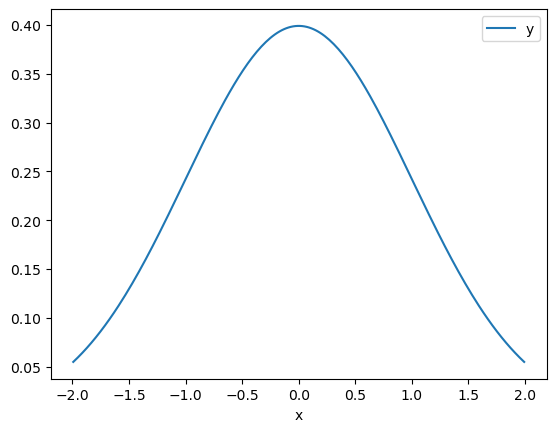

In [3]:
norm_df.loc[-2:2].plot()

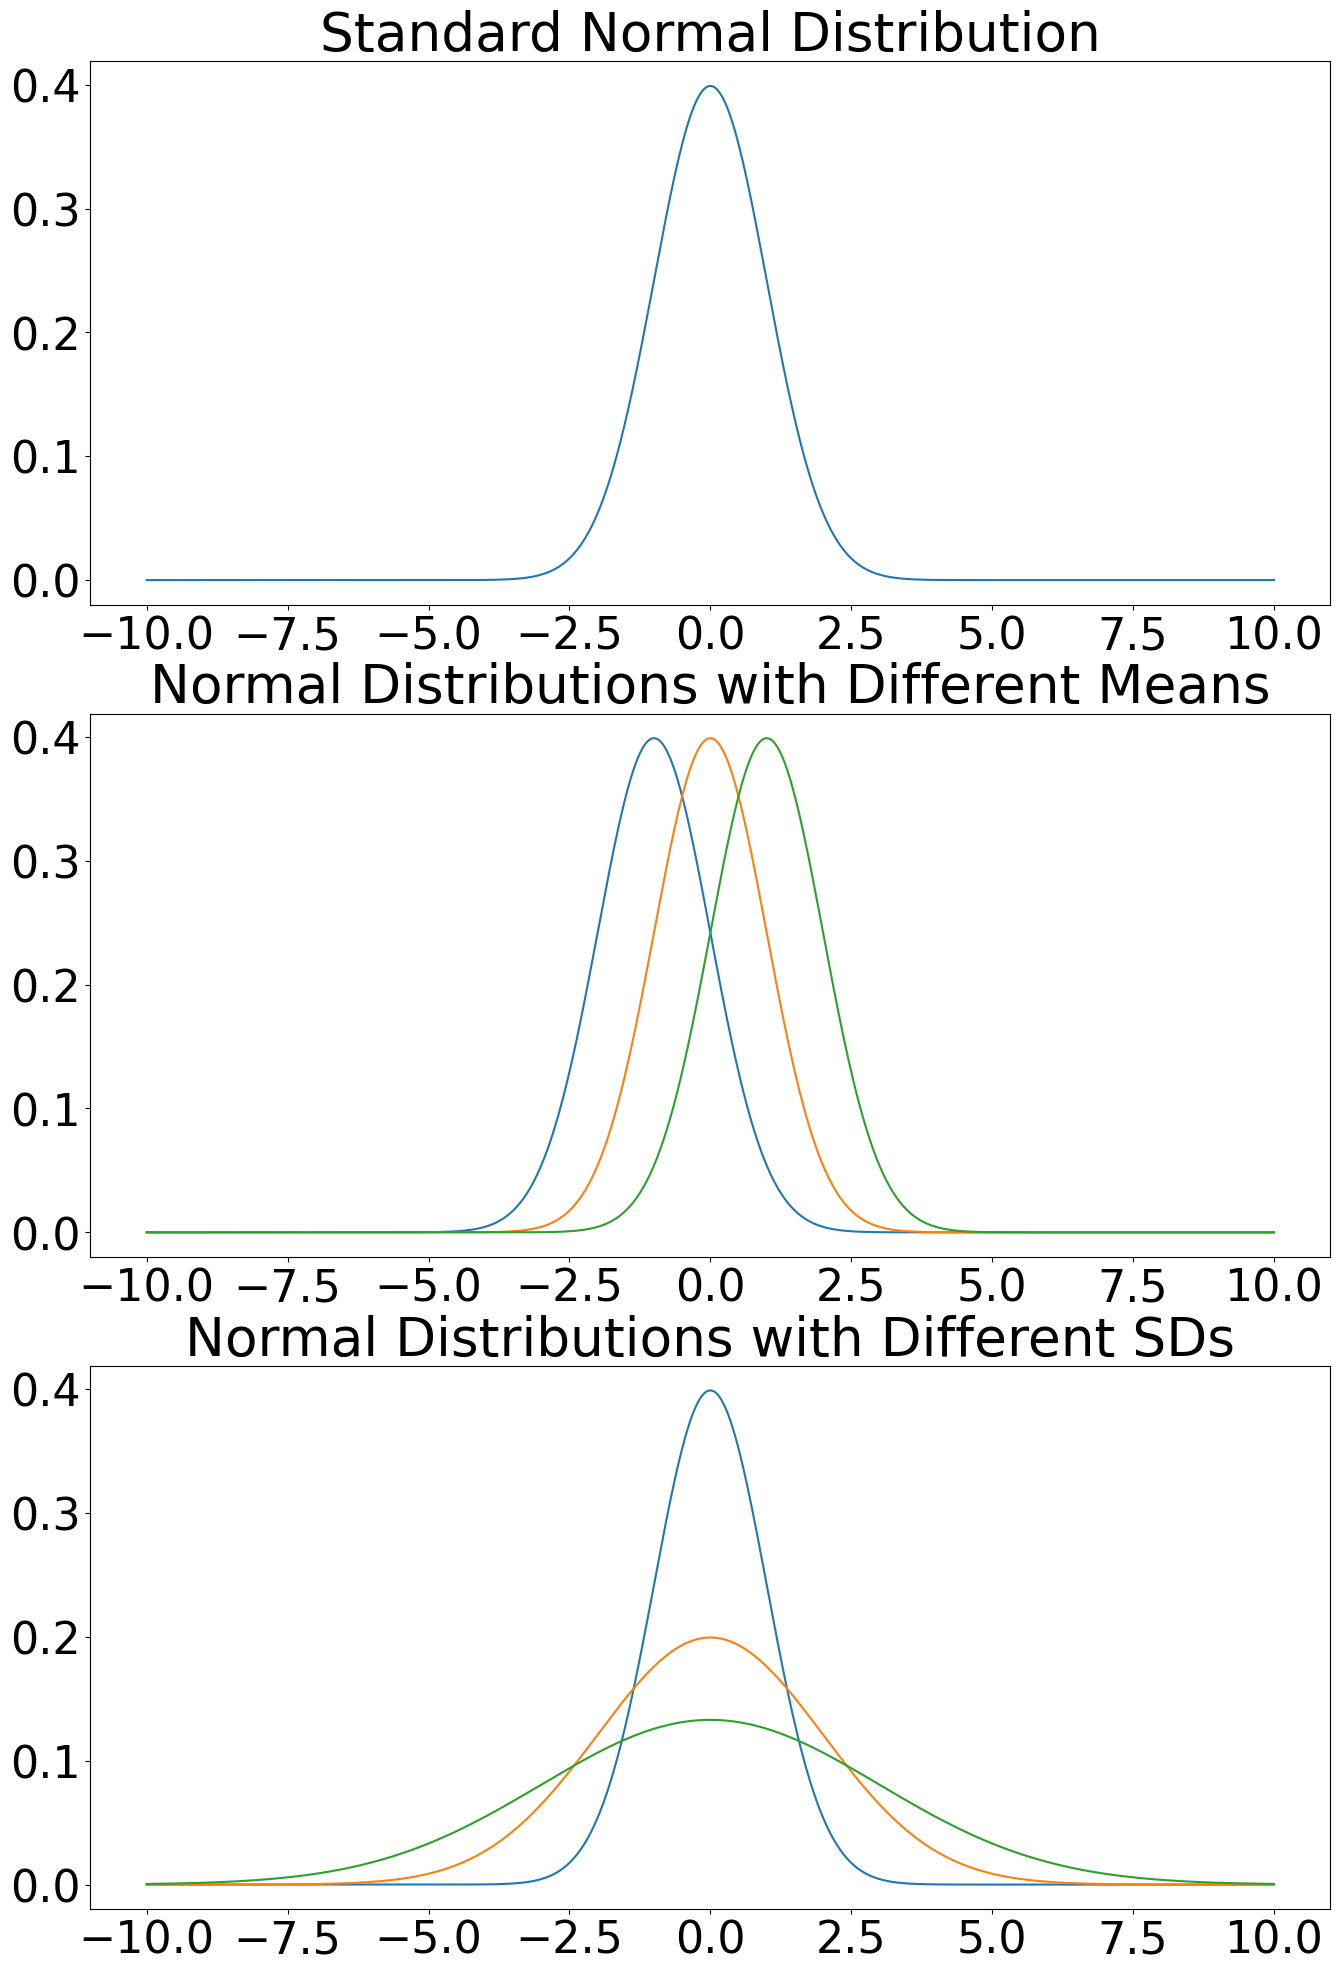

In [4]:
plt.rcParams.update({'font.size': 32})

# create a multiplot that has 3 stacked visualization
## axs will have indices 0,1,2
fig, axs = plt.subplots(3,1, figsize = (16,24))
normal_dist_list = normal_dist(mean = 0, sd = 1)
## in plot 0, only create a standard normal distribution with mean=0, sd = 1
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Standard Normal Distribution")

# in plot 1, create 3 distributions with means of -1,0,1 and sd = 1
for mean_ in range(-1,1+1,1):
    normal_dist_list = normal_dist(mean = mean_, sd = 1)
    axs[1].plot(x, normal_dist_list, label = "Normal Distribution")
    axs[1].set_title("Normal Distributions with Different Means")
    
# in plot 2, create 3 distribution with mean = 0 and sds of 1,2,3
for sd_ in range(1,3+1):
    normal_dist_list = normal_dist(mean = 0, sd = sd_)
    axs[2].plot(x, normal_dist_list, label = "Normal Distribution")
    axs[2].set_title("Normal Distributions with Different SDs")

## Lognormal Distribution

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 



C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2019411194.py:2: RuntimeWarning: divide by zero encountered in divide
  prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(
C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2019411194.py:3: RuntimeWarning: divide by zero encountered in log
  -(np.log(x) - mean)**2 / (2*sd**2))
C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2019411194.py:2: RuntimeWarning: invalid value encountered in multiply
  prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(


Text(0.5, 1.0, 'Log Normal Distribution with Logged x-axis')

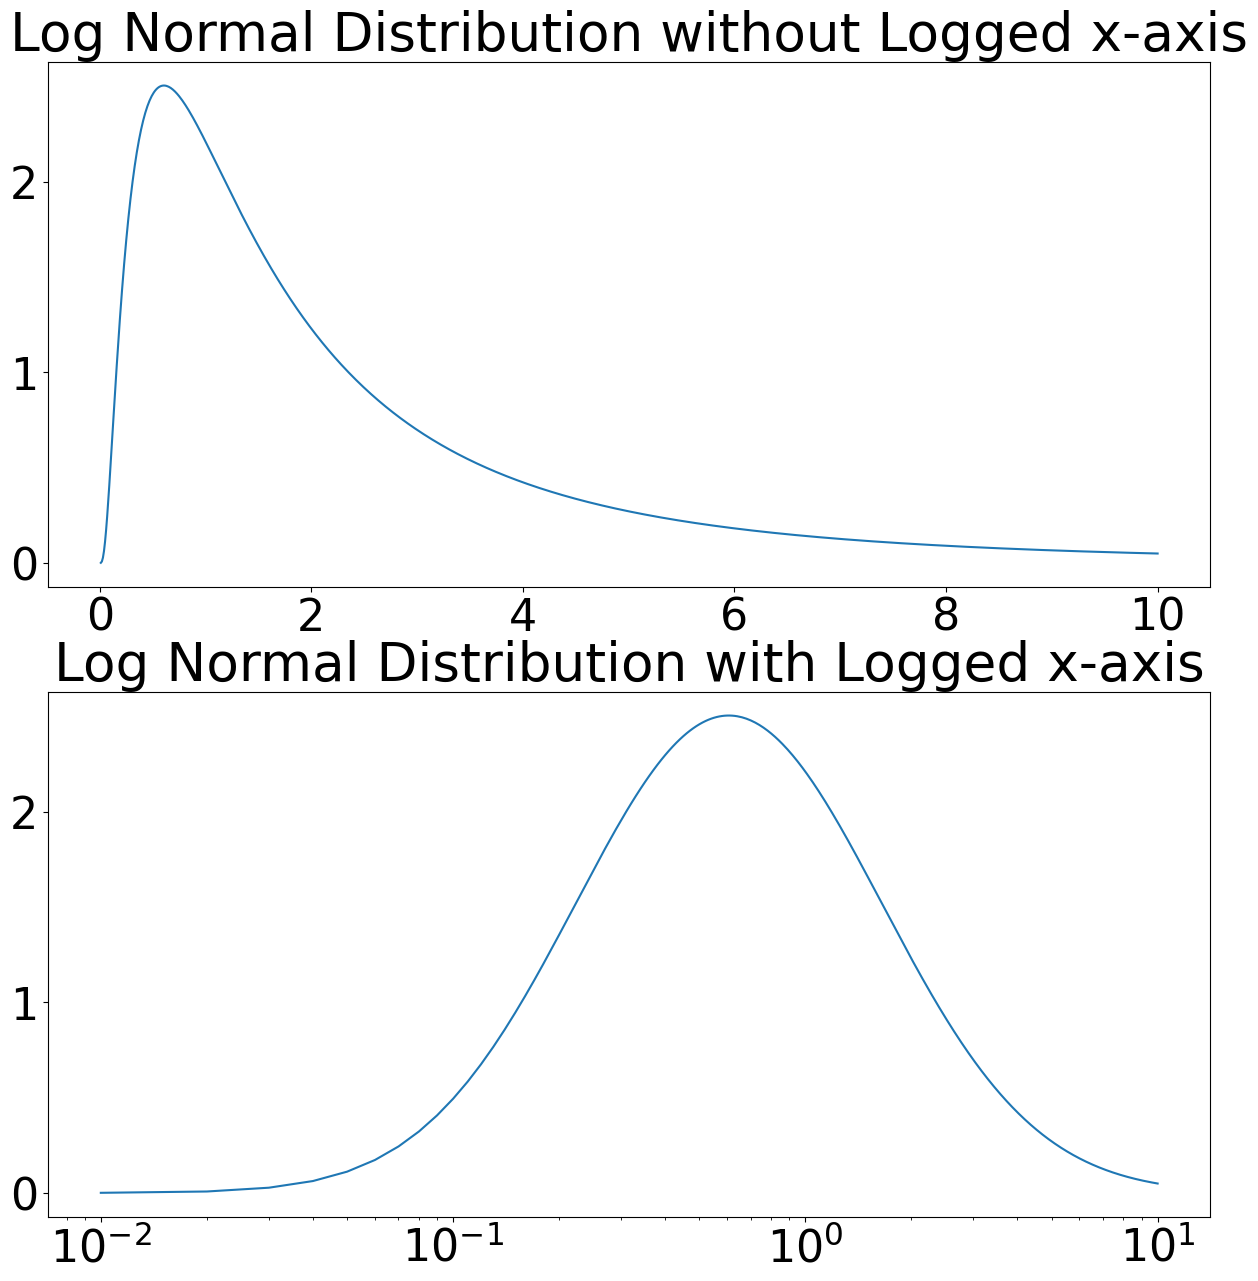

In [5]:
def create_lognormal(mean, sd, x = np.linspace(0, 10, 1000)):
    prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(
        -(np.log(x) - mean)**2 / (2*sd**2))
    return prob_density
# start linspace from 0; log(0) will be a null value, but the next value
## will not be null
x = np.linspace(0,10,1000)
mean = .5
lognorm = create_lognormal(mean,1,x)
fig, axs = plt.subplots(2,1, figsize = (15,15))
axs[0].plot(x, lognorm)
axs[0].set_title("Log Normal Distribution without Logged x-axis")
axs[1].plot(x, lognorm)
axs[1].set_xscale("log")
axs[1].set_title("Log Normal Distribution with Logged x-axis")

In [6]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime


yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
data_dict["AAPL"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433823,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500643,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771560,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45074500
2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900


In [8]:
[val["Close"] for val in data_dict.values()]

[Date
 2012-01-03     26.770000
 2012-01-04     27.400000
 2012-01-05     27.680000
 2012-01-06     28.110001
 2012-01-09     27.740000
                  ...    
 2024-02-23    410.339996
 2024-02-26    407.540009
 2024-02-27    407.480011
 2024-02-28    407.720001
 2024-02-29    413.640015
 Name: Close, Length: 3059, dtype: float64,
 Date
 2012-01-03     14.686786
 2012-01-04     14.765714
 2012-01-05     14.929643
 2012-01-06     15.085714
 2012-01-09     15.061786
                  ...    
 2024-02-23    182.520004
 2024-02-26    181.160004
 2024-02-27    182.630005
 2024-02-28    181.419998
 2024-02-29    180.750000
 Name: Close, Length: 3059, dtype: float64,
 Date
 2012-01-03     66.830002
 2012-01-04     66.800003
 2012-01-05     66.519997
 2012-01-06     66.360001
 2012-01-09     66.639999
                  ...    
 2024-02-23    161.029999
 2024-02-26    160.220001
 2024-02-27    159.300003
 2024-02-28    160.050003
 2024-02-29    158.940002
 Name: Close, Length: 3059, dtype: f

In [9]:
# pd.concatenate will join a list of series values either vertically (axis = 0)
## or join them horizontally (axis = 1)
close_data = pd.concat([val["Close"] for val in data_dict.values()],
                       # keys dictionary should be in the same order as each
                       ## relevant "Close" series
                      keys = data_dict.keys(),
                      axis = 1)
close_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,66.830002,1.872000
2012-01-04,27.400000,14.765714,66.800003,1.847333
2012-01-05,27.680000,14.929643,66.519997,1.808000
2012-01-06,28.110001,15.085714,66.360001,1.794000
2012-01-09,27.740000,15.061786,66.639999,1.816667
...,...,...,...,...
2024-02-23,410.339996,182.520004,161.029999,191.970001
2024-02-26,407.540009,181.160004,160.220001,199.399994
2024-02-27,407.480011,182.630005,159.300003,199.729996


Text(0.5, 1.0, 'Daily Stock Prices')

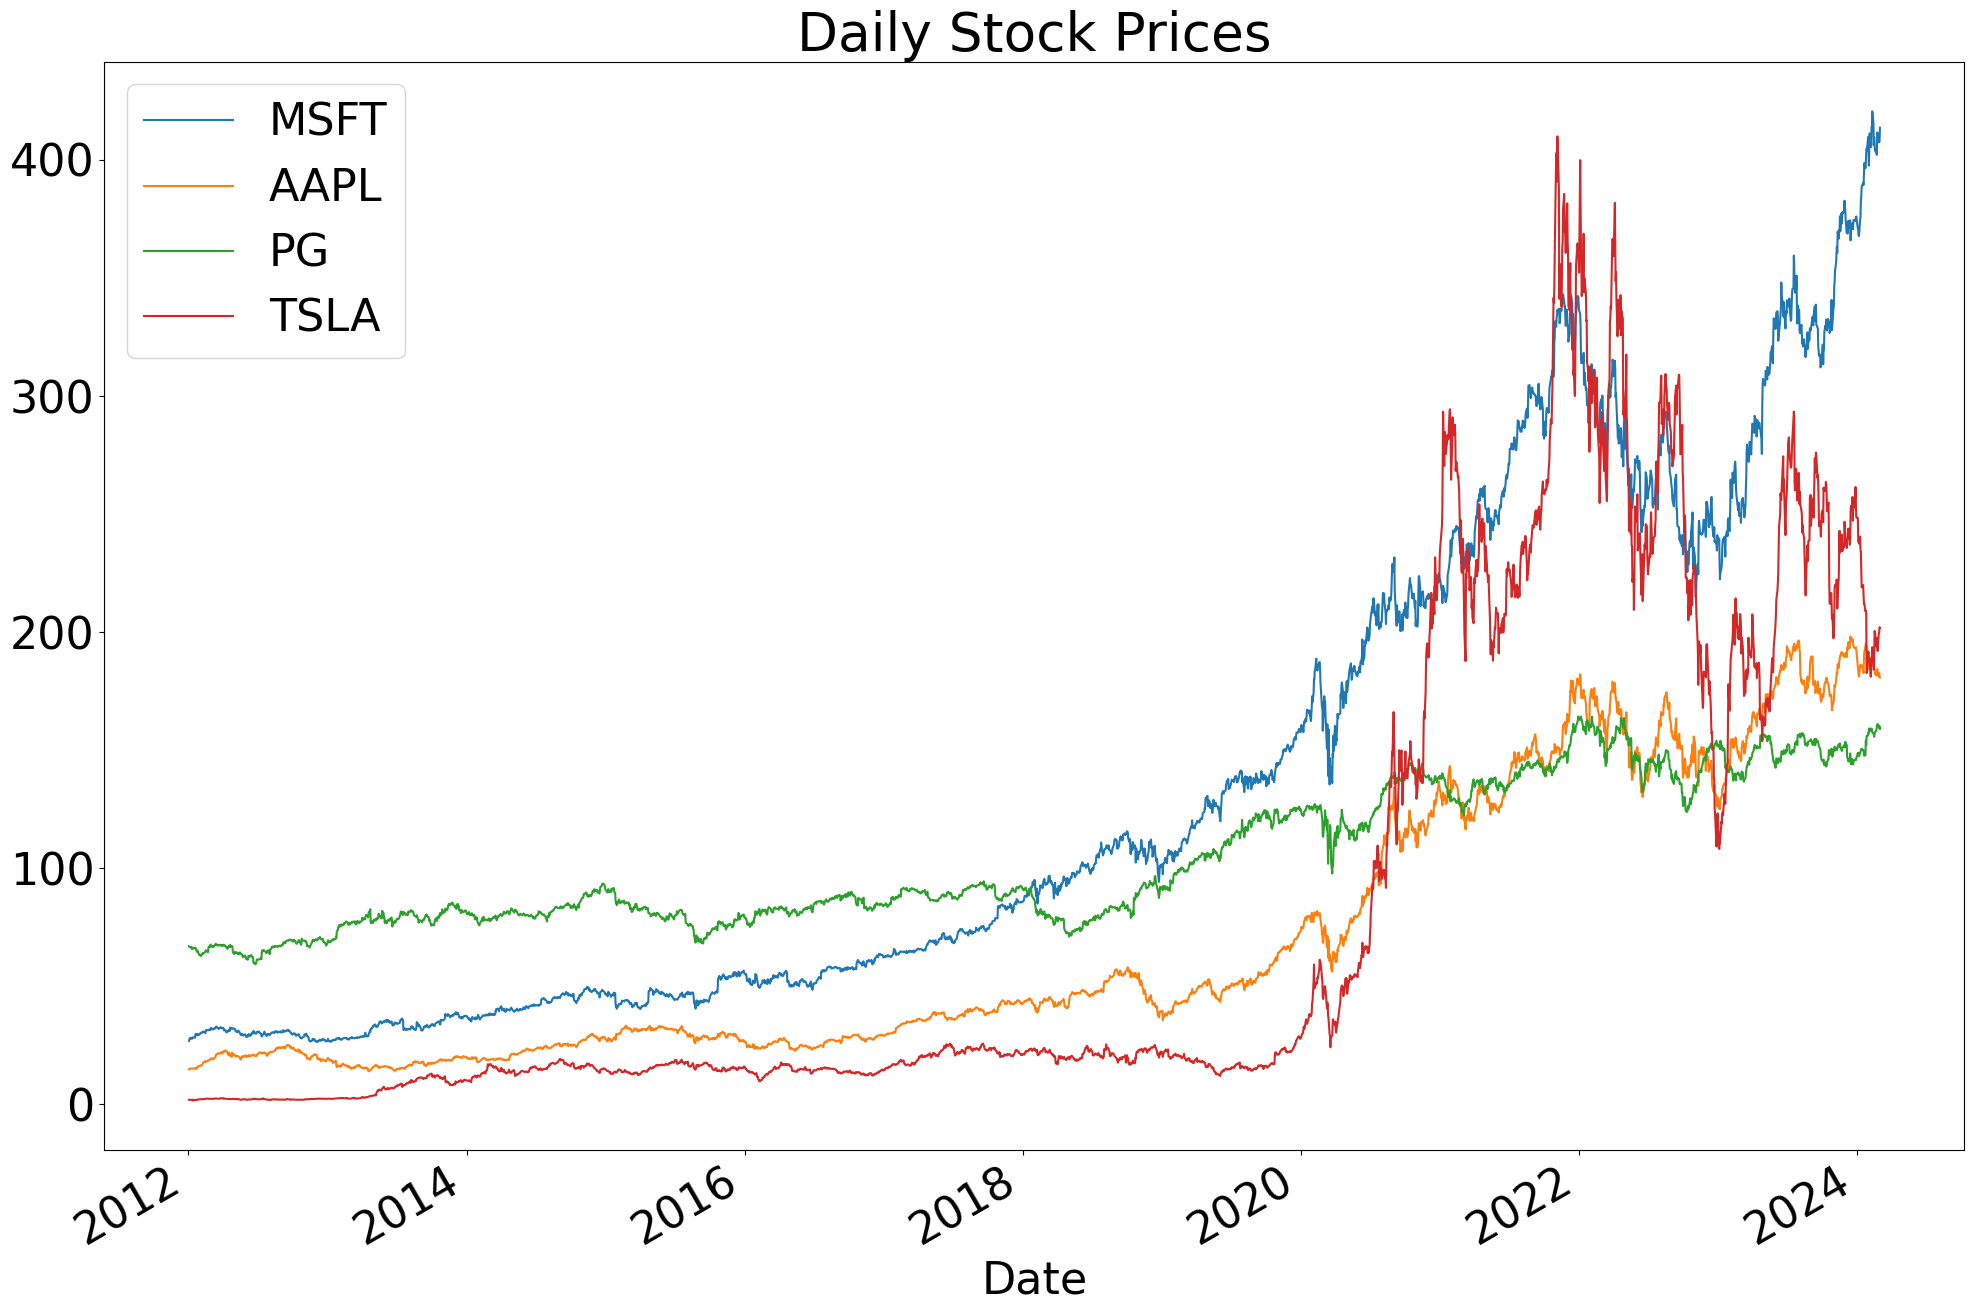

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend=True, ax  =ax)
ax.set_title("Daily Stock Prices")

## Logging data helps compare relative changes

C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2778751477.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in y_vals])


[Text(0, 0.1, '0'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

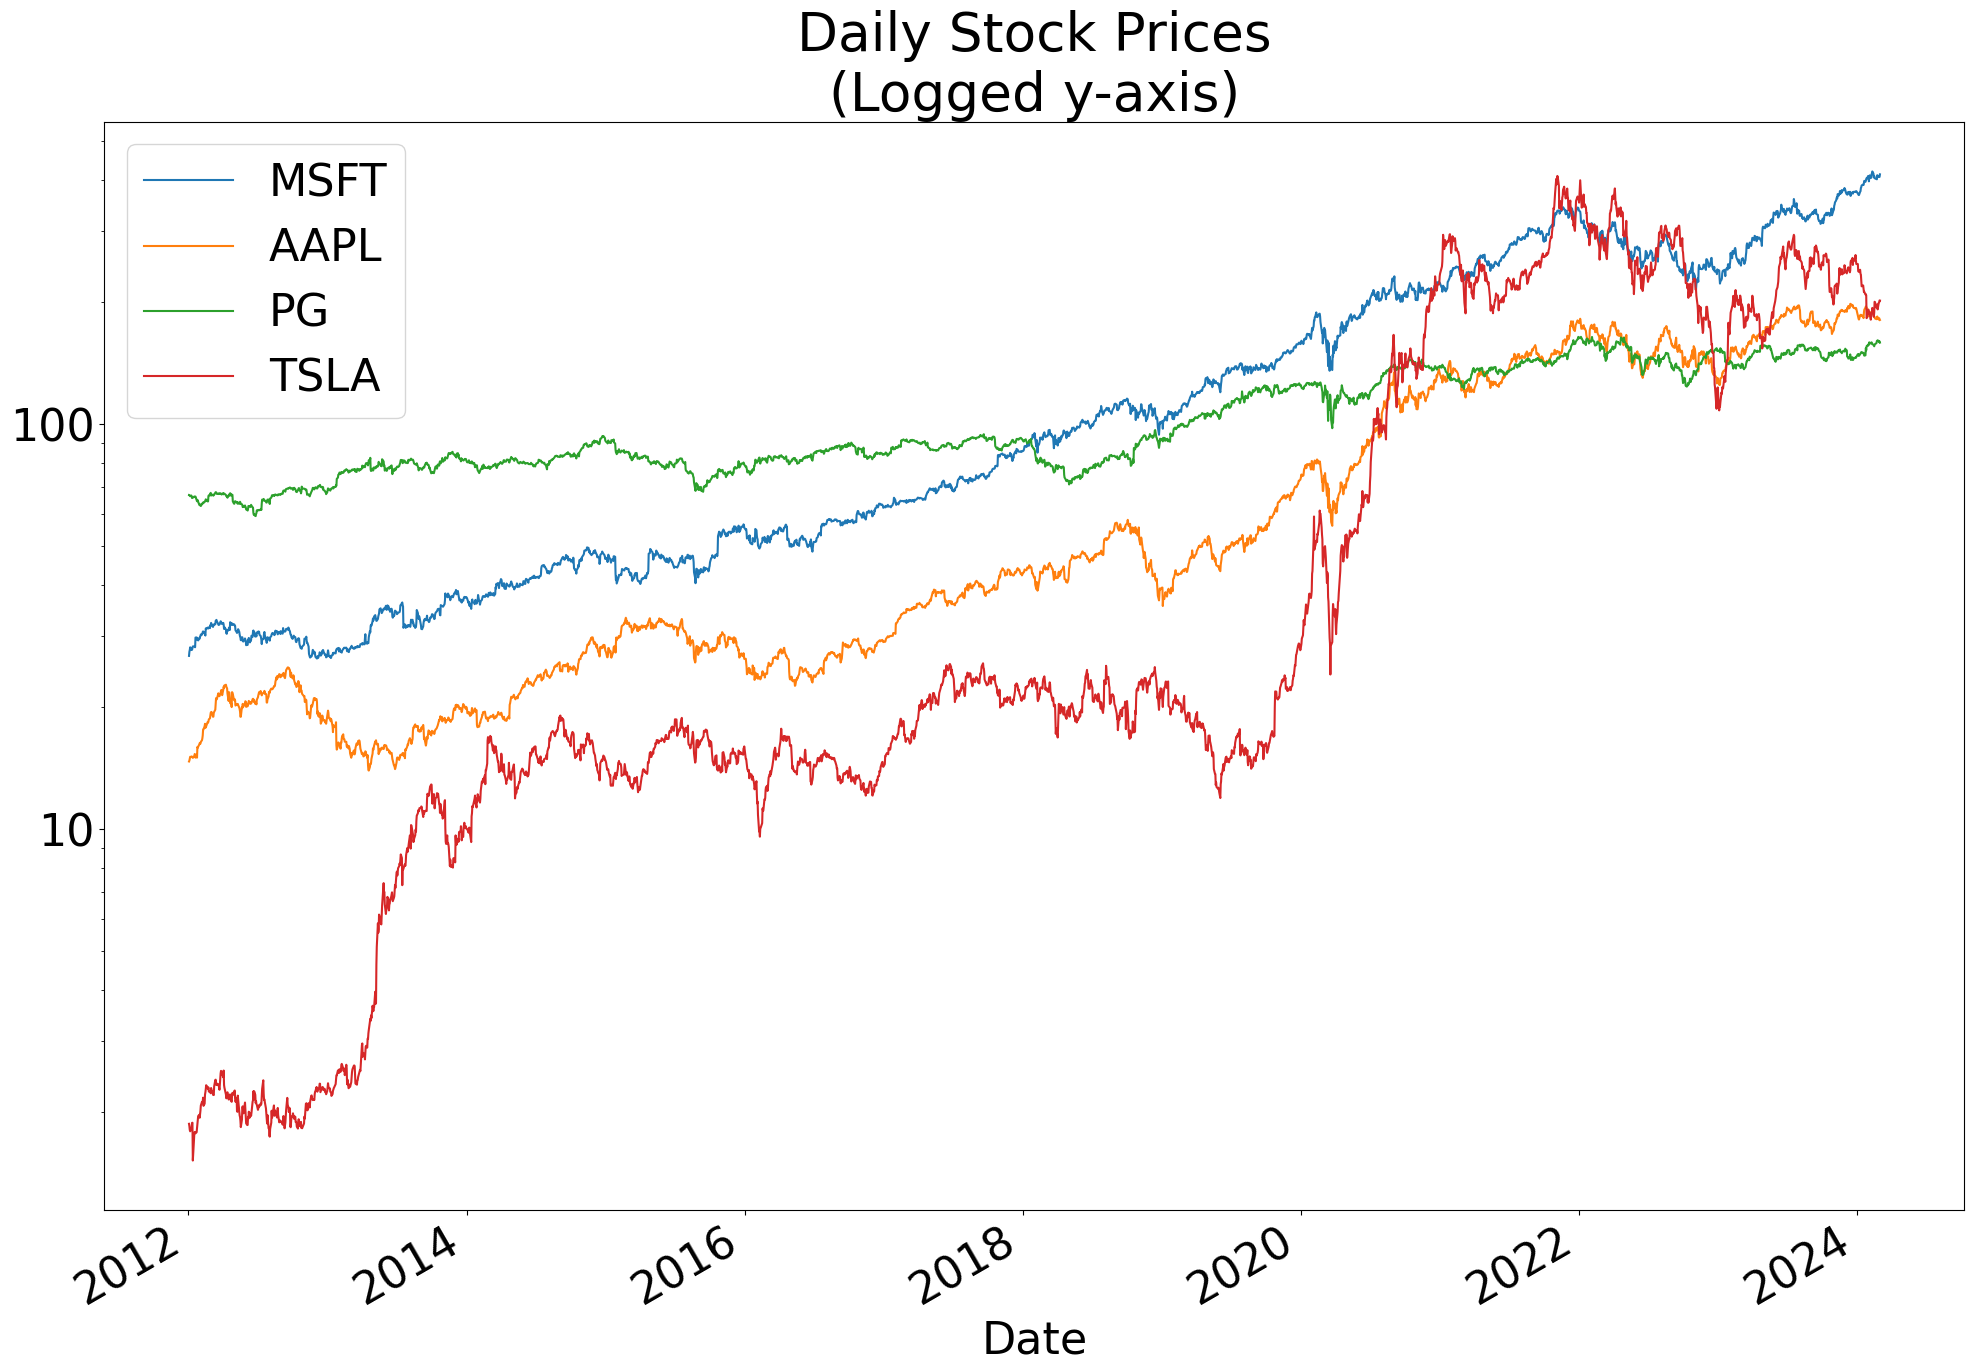

In [11]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend=True, ax  =ax)
ax.set_title("Daily Stock Prices\n(Logged y-axis)")
ax.set_yscale("log")
# reset y labels to integer from scientific
#access values form the yaxis
y_vals = ax.get_yticks()
# use generator to transform each y value into an integer
ax.set_yticklabels([int(y) for y in y_vals])

<Axes: >

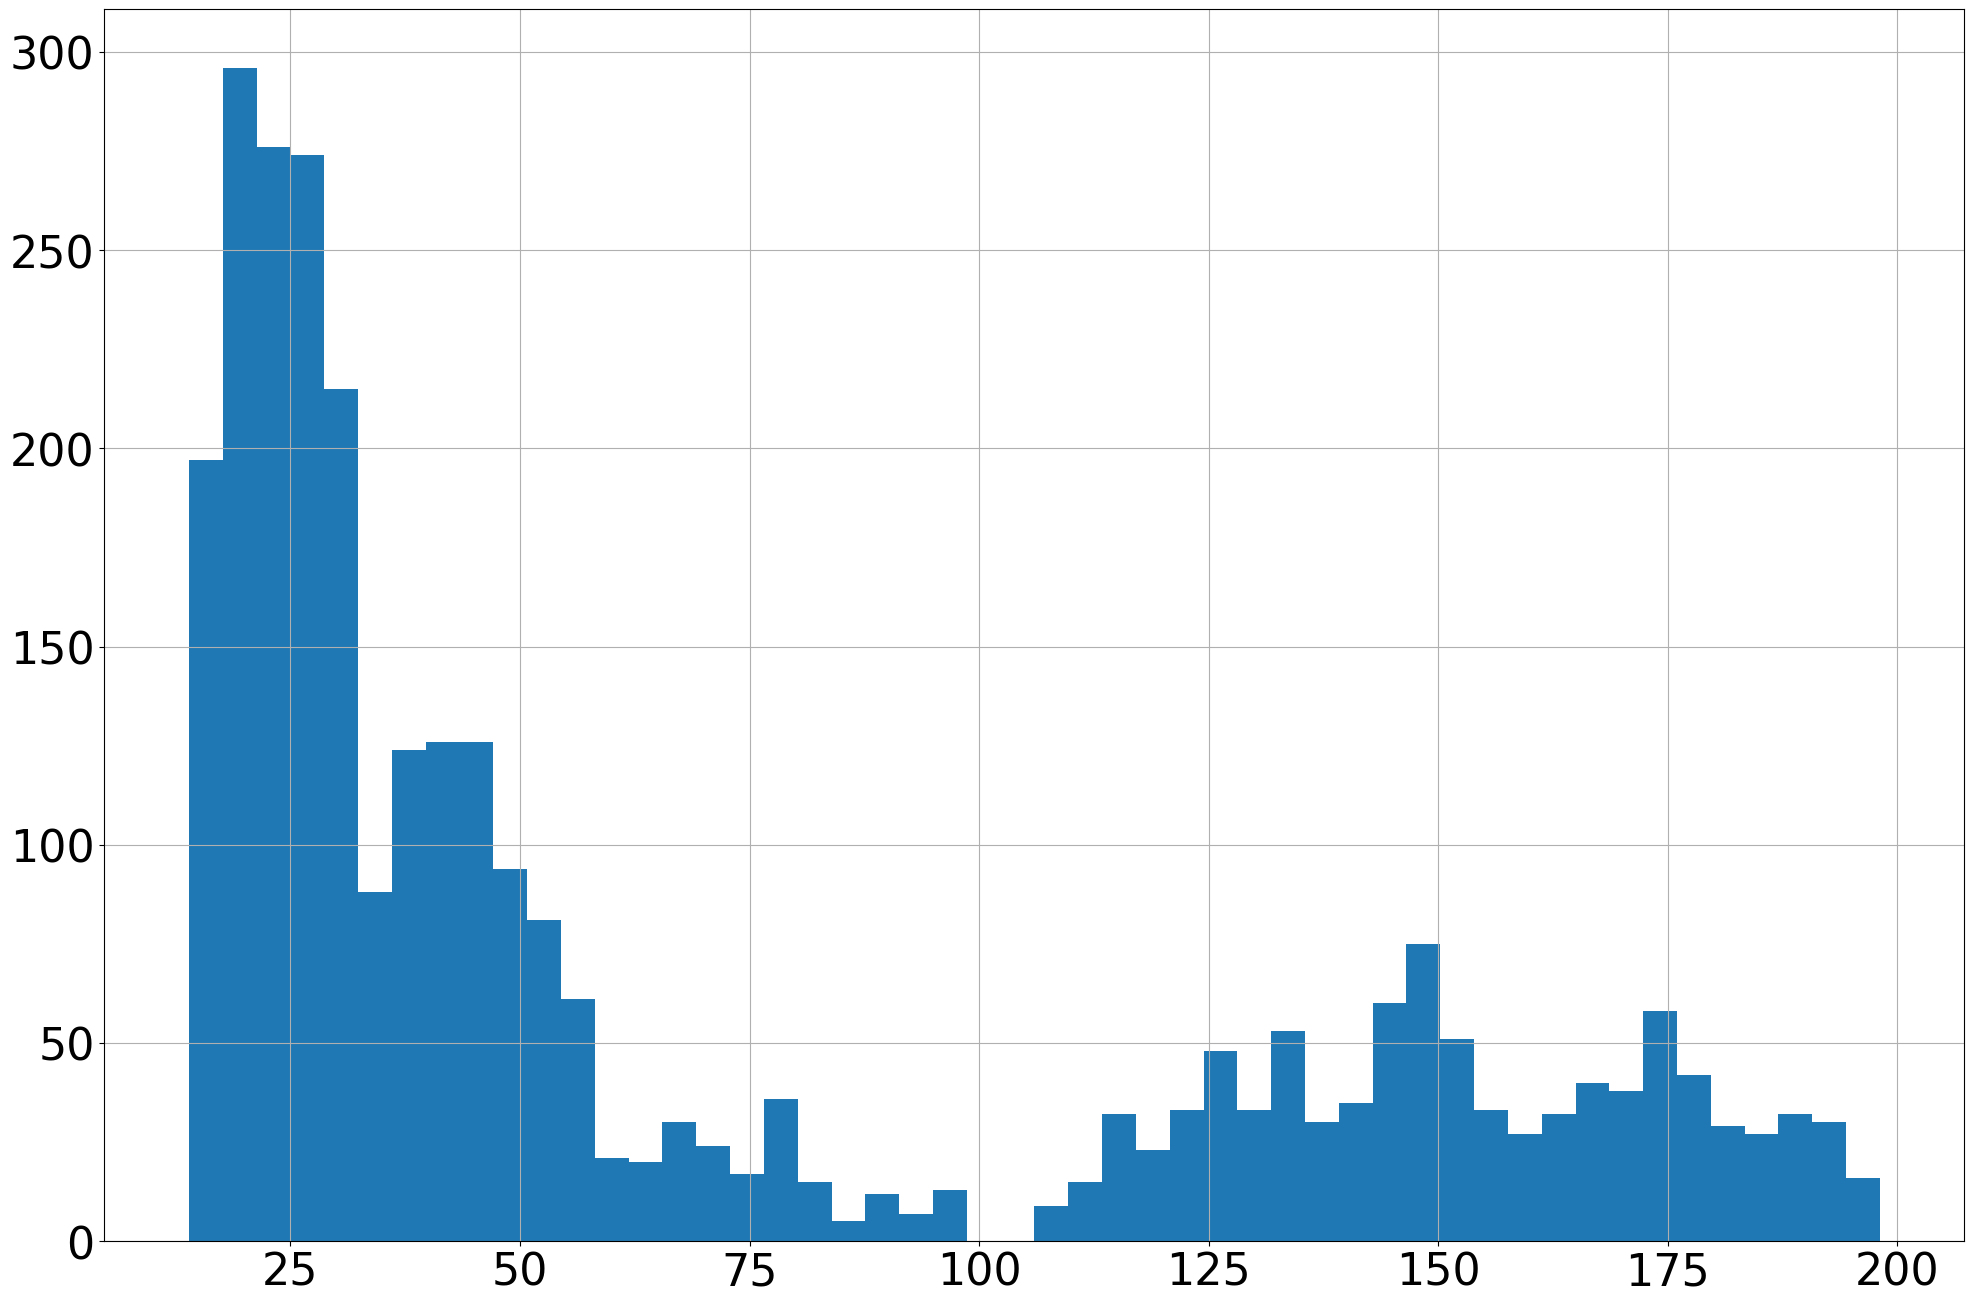

In [12]:
fig, ax = plt.subplots(figsize = (24,16))
close_data["AAPL"].hist(bins = 50, label = "AAPL")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\900245249.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  close_data.hist(bins = 50, alpha = .5, ax = ax)


array([[<Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'AAPL'}>],
       [<Axes: title={'center': 'PG'}>, <Axes: title={'center': 'TSLA'}>]],
      dtype=object)

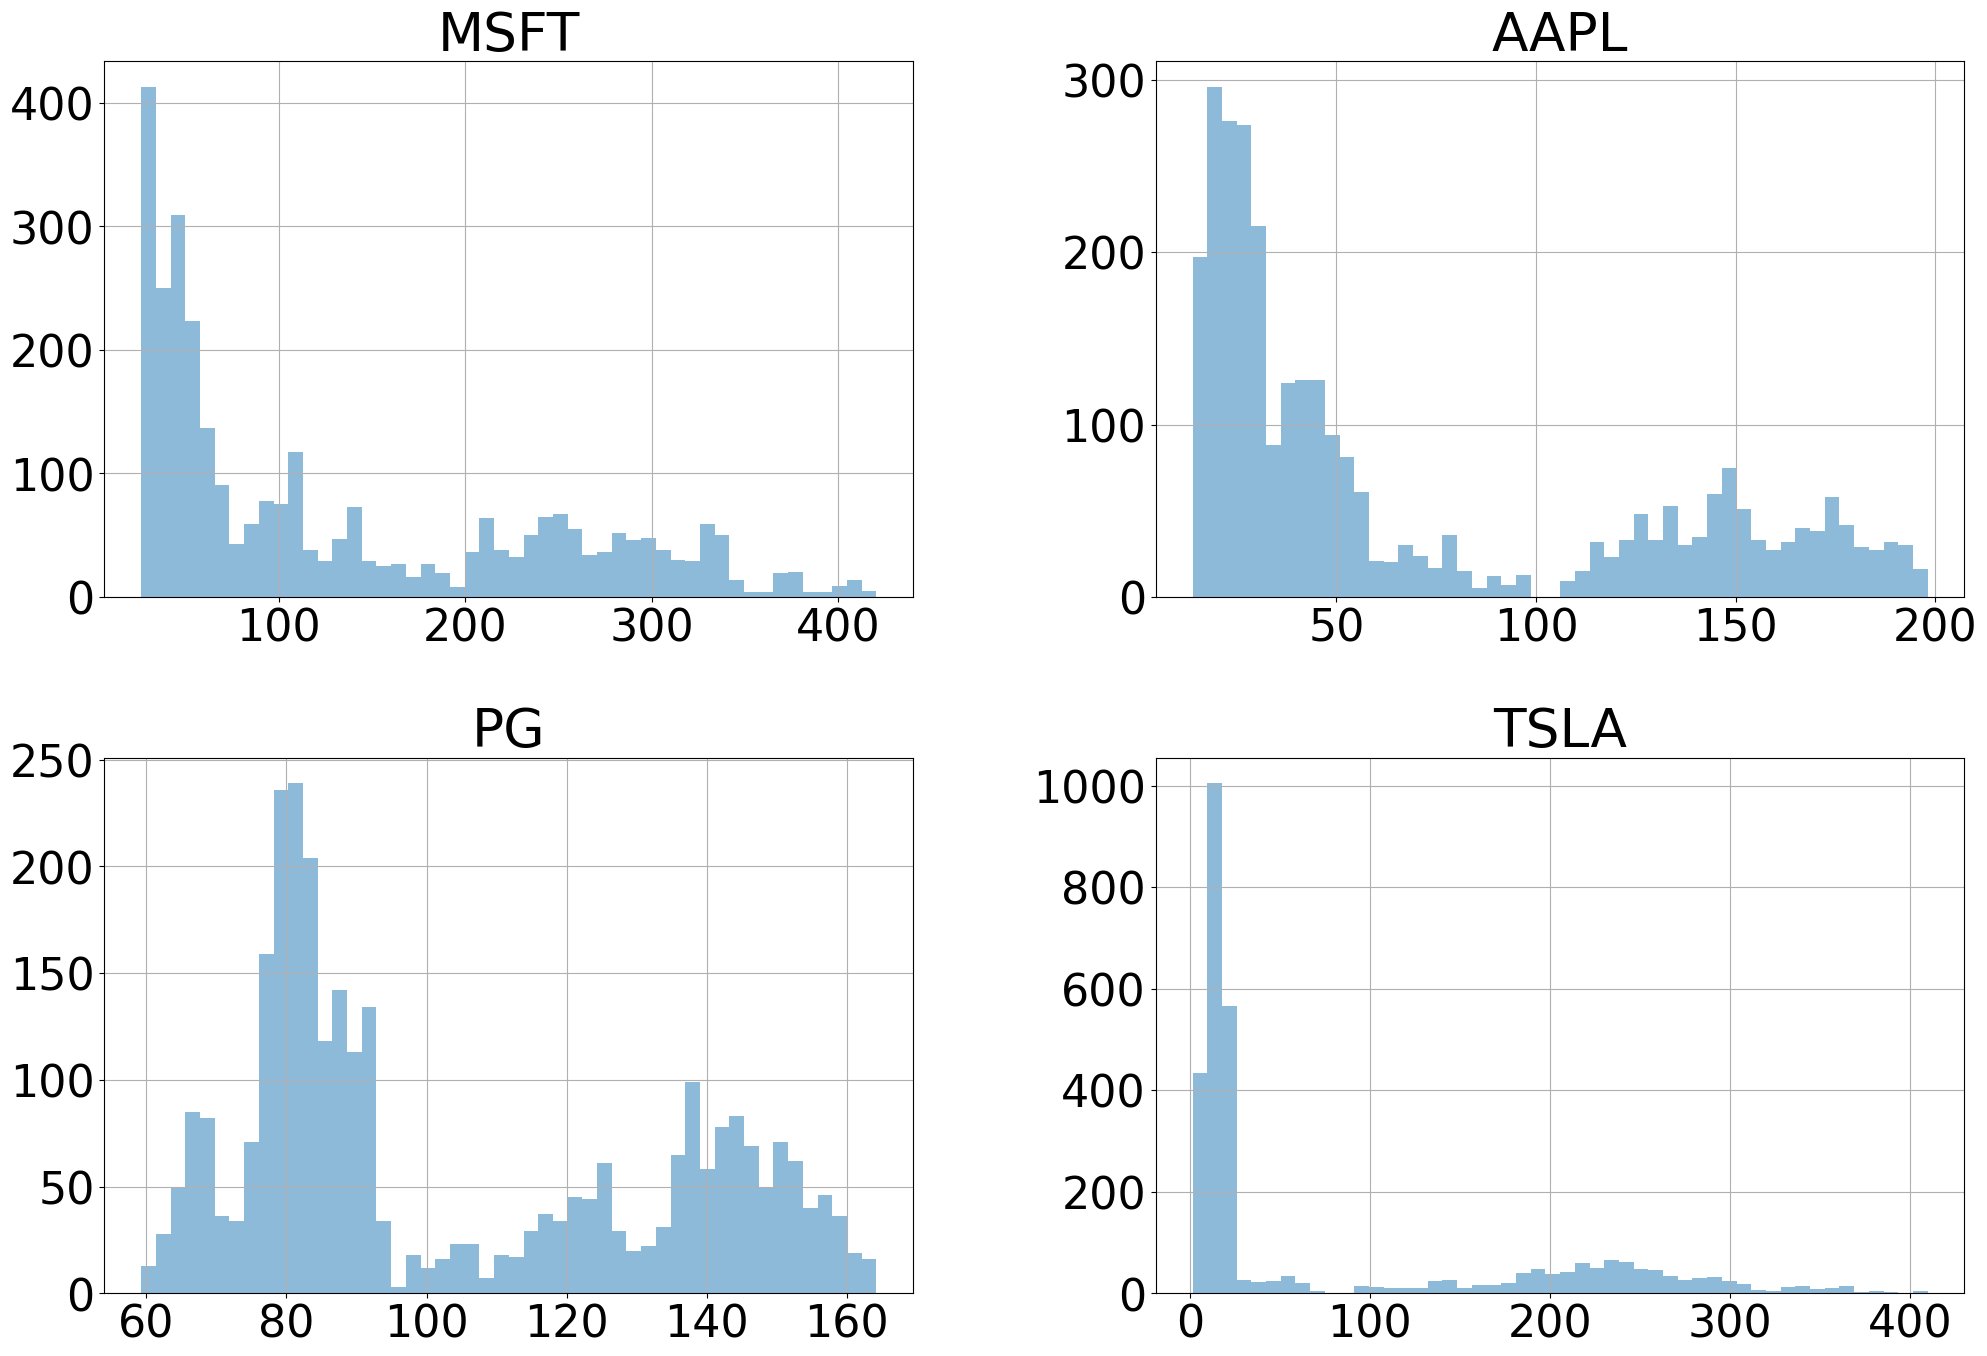

In [13]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.hist(bins = 50, alpha = .5, ax = ax)


### Log the data so that changes in the data are approximate percent changes (i.e., proportional)

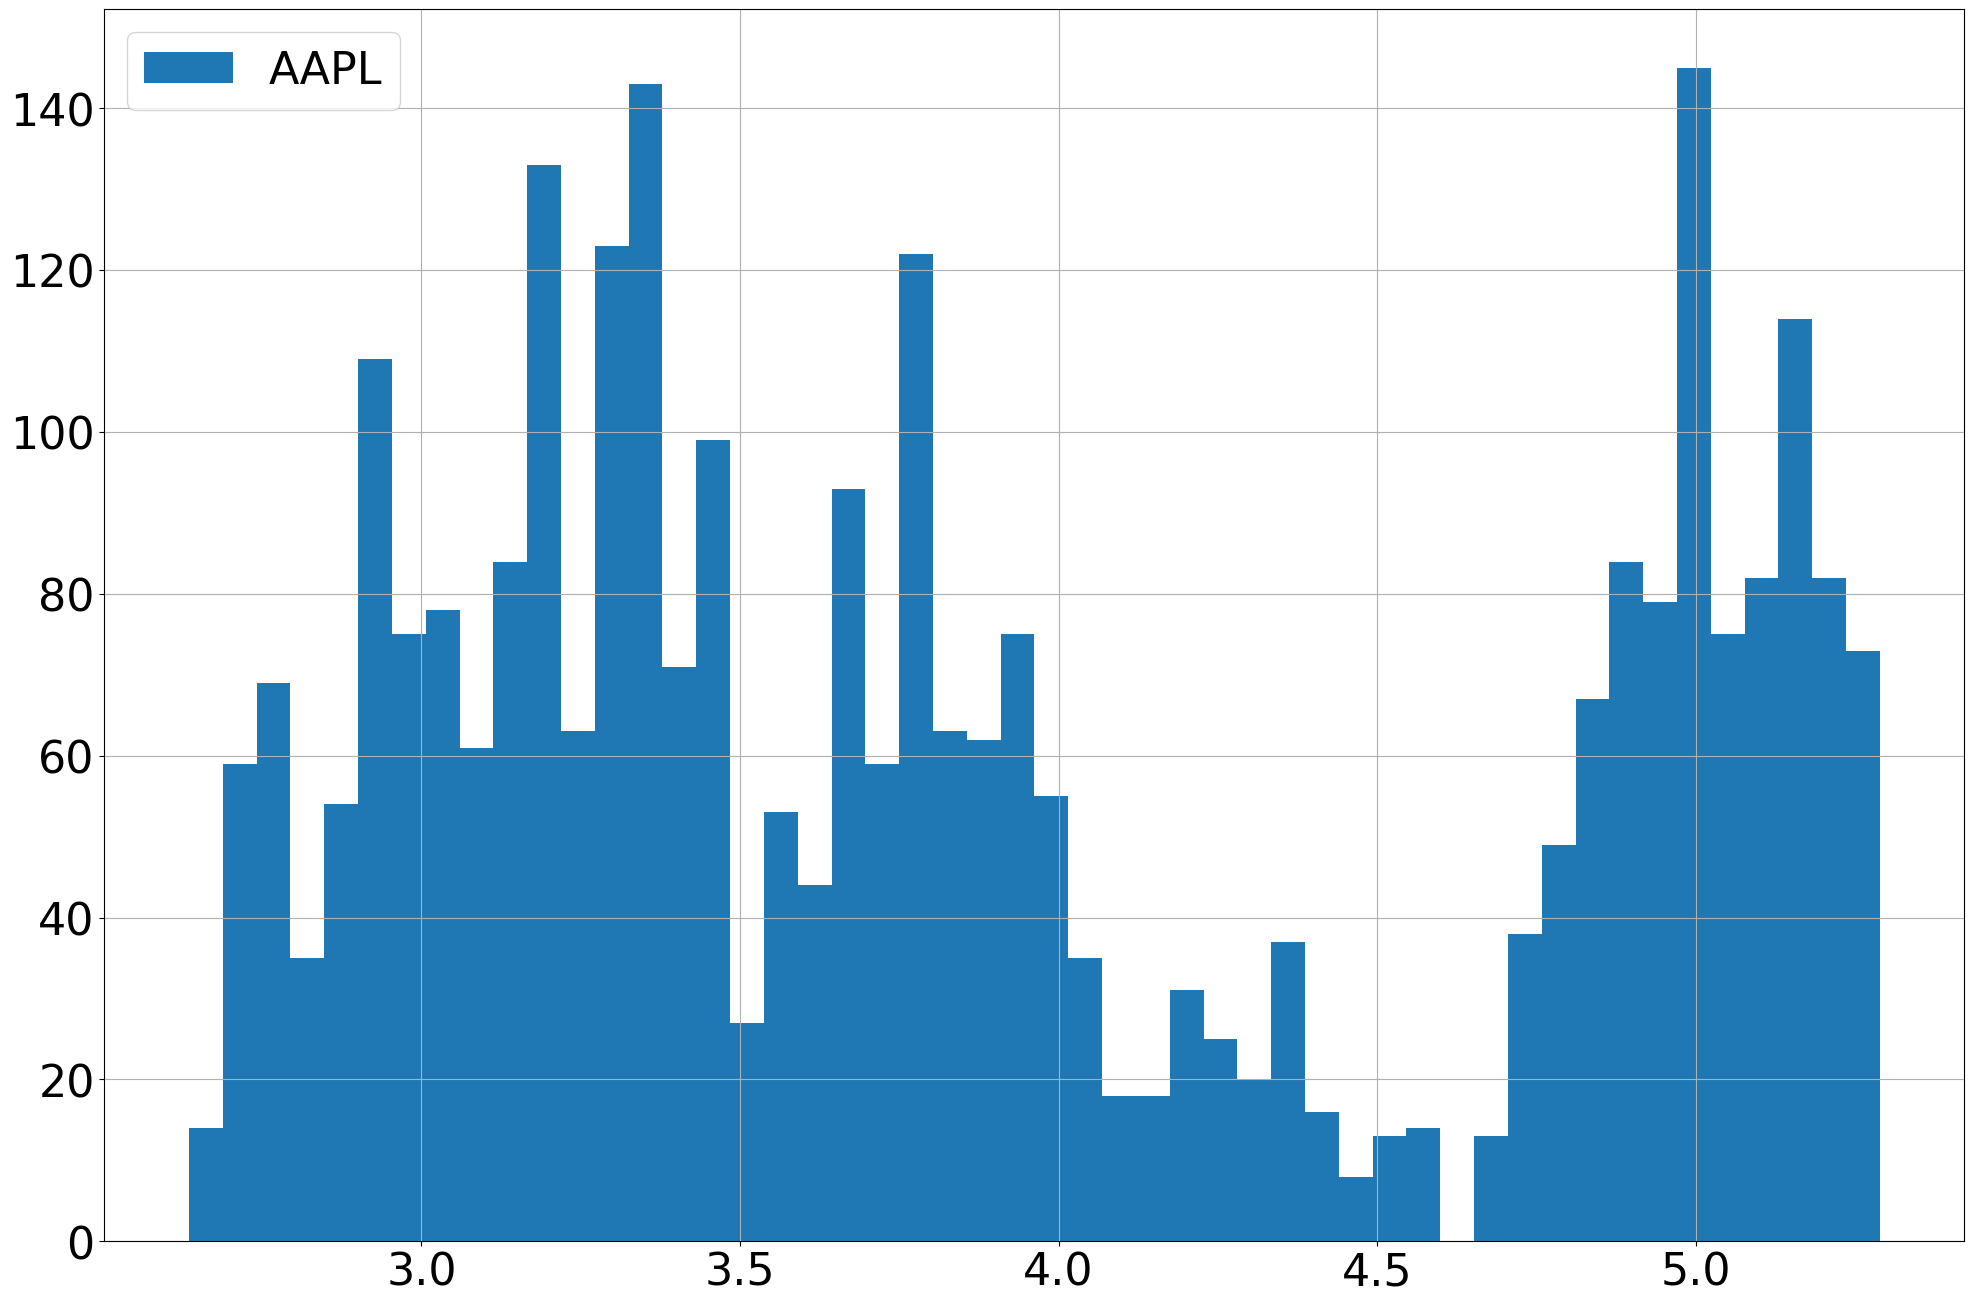

In [14]:
import numpy as np
log_data = np.log(close_data)
fig, ax = plt.subplots(figsize = (24, 16))
log_data["AAPL"].hist(bins = 50, label ="AAPL")
plt.legend()

In [15]:
def graph_yearly_distribution(data, key):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = (24,16))
    for year in years:
        color = "C" + str(year % 20)
        year = str(year)
        plot_data = data.loc[year, key]
        plot_data.hist(bins = 20,
                       color = color,
                      label = year,
                      alpha = .6,
                      ax = ax)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
    ax.set_title(key)
    ax.legend(bbox_to_anchor = (1,1.25), ncols = 5)


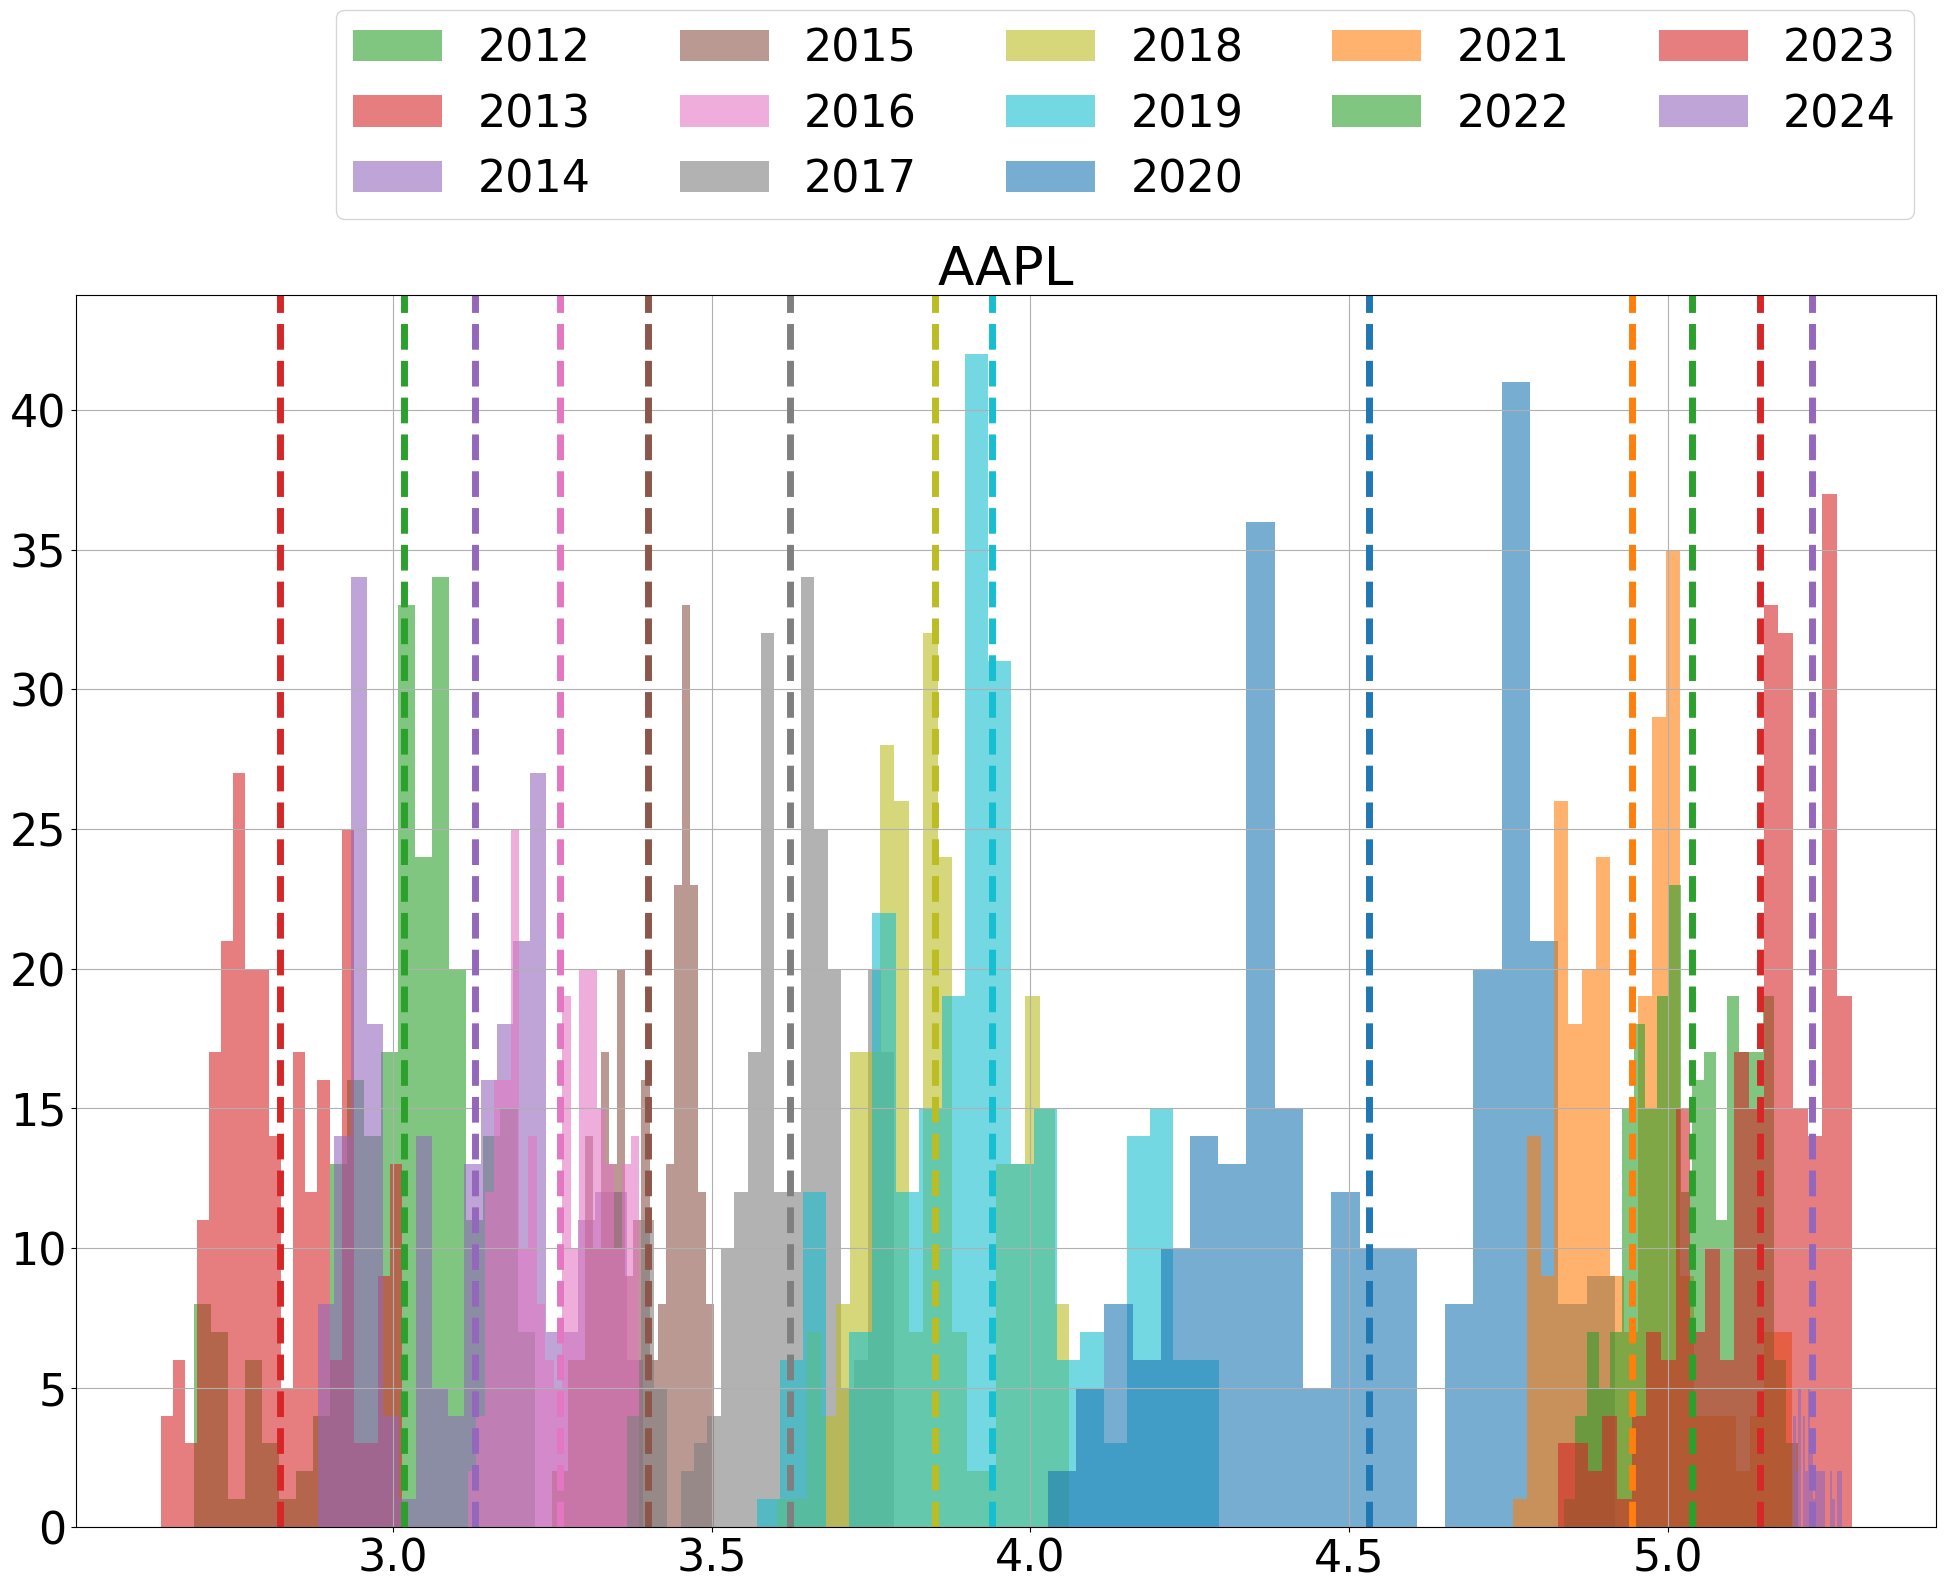

In [16]:
graph_yearly_distribution(log_data,"AAPL")

In [17]:
price_change_data = log_data.diff().mul(100).dropna()
price_change_data.to_csv("StockData.csv")

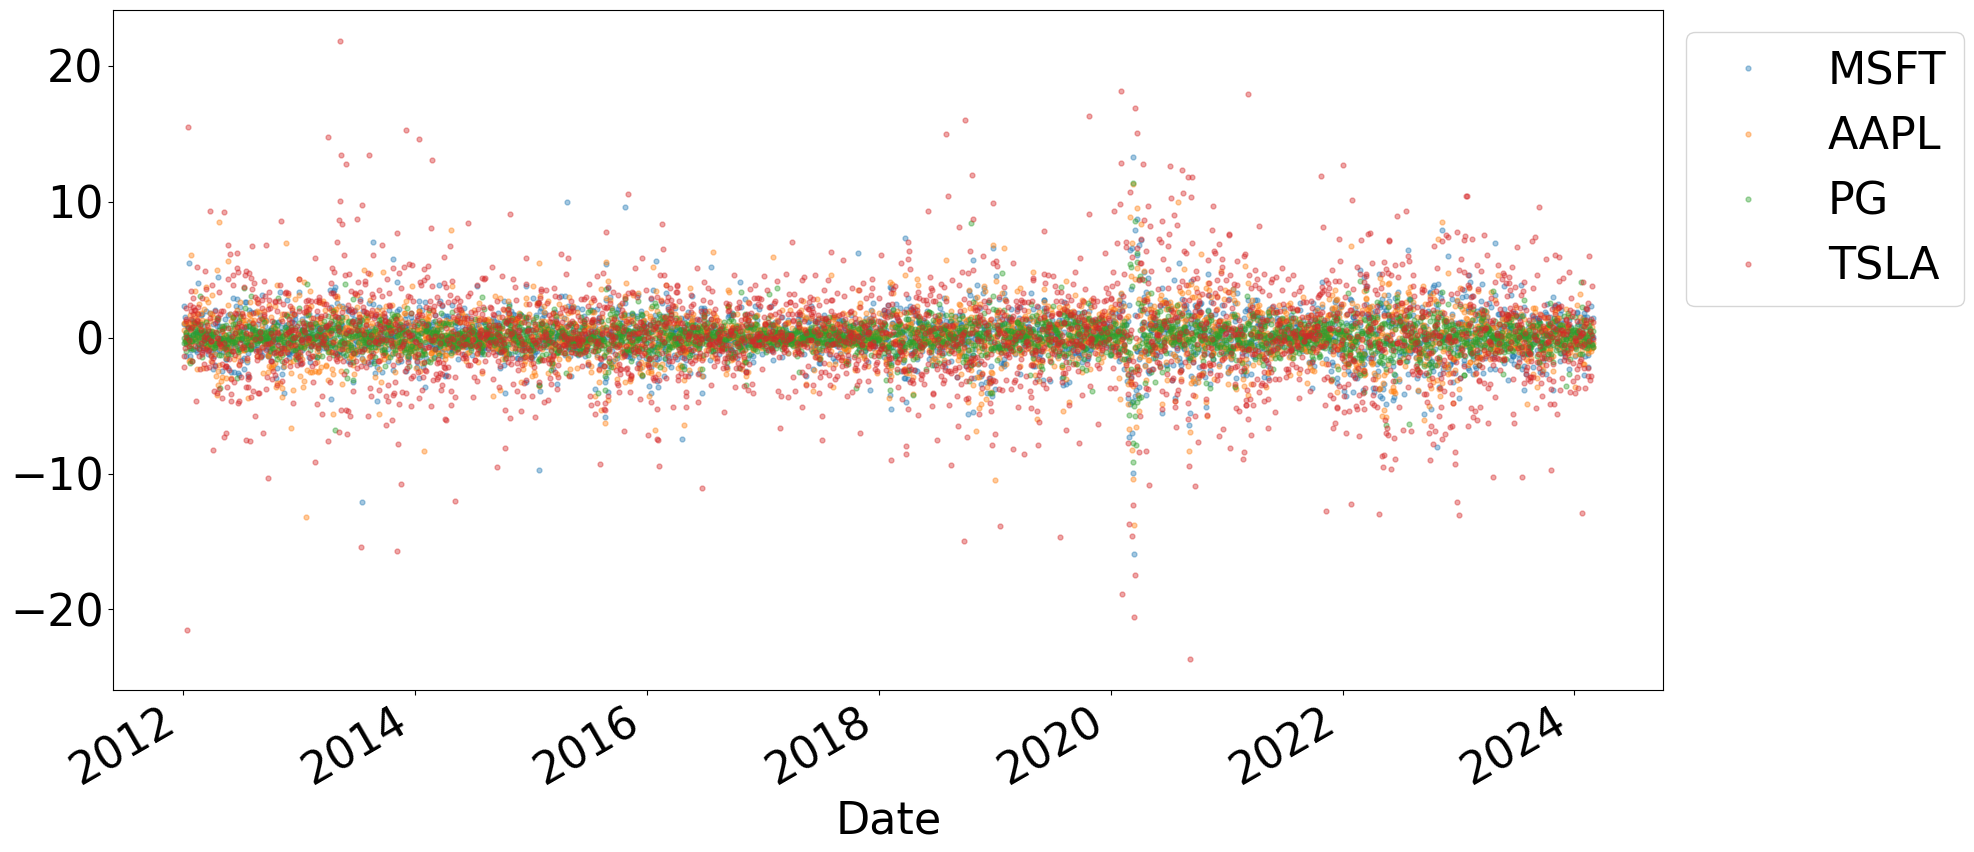

In [18]:
fig, ax = plt.subplots(figsize = (20,10))
price_change_data.plot.line(marker = ".", 
                            ls = "", 
                            markersize = 7,
                            alpha = .4,
                            ax = ax, 
                            legend = False)
ax.legend(bbox_to_anchor = (1,1))


In [19]:
from stats import *
stats_df = gather_statistics(price_change_data, 
                            sample = False).round(2)
stats_df

,MSFT,AAPL,PG,TSLA
mean,0.09,0.08,0.03,0.15
median,0.07,0.07,0.04,0.14
variance,2.75,3.20,1.25,12.58
SD,1.66,1.79,1.12,3.55
SE,0.03,0.03,0.02,0.06
skewness,-0.20,-0.28,-0.03,-0.06
kurtosis,11.55,8.89,14.81,7.98


C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\1329077666.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])


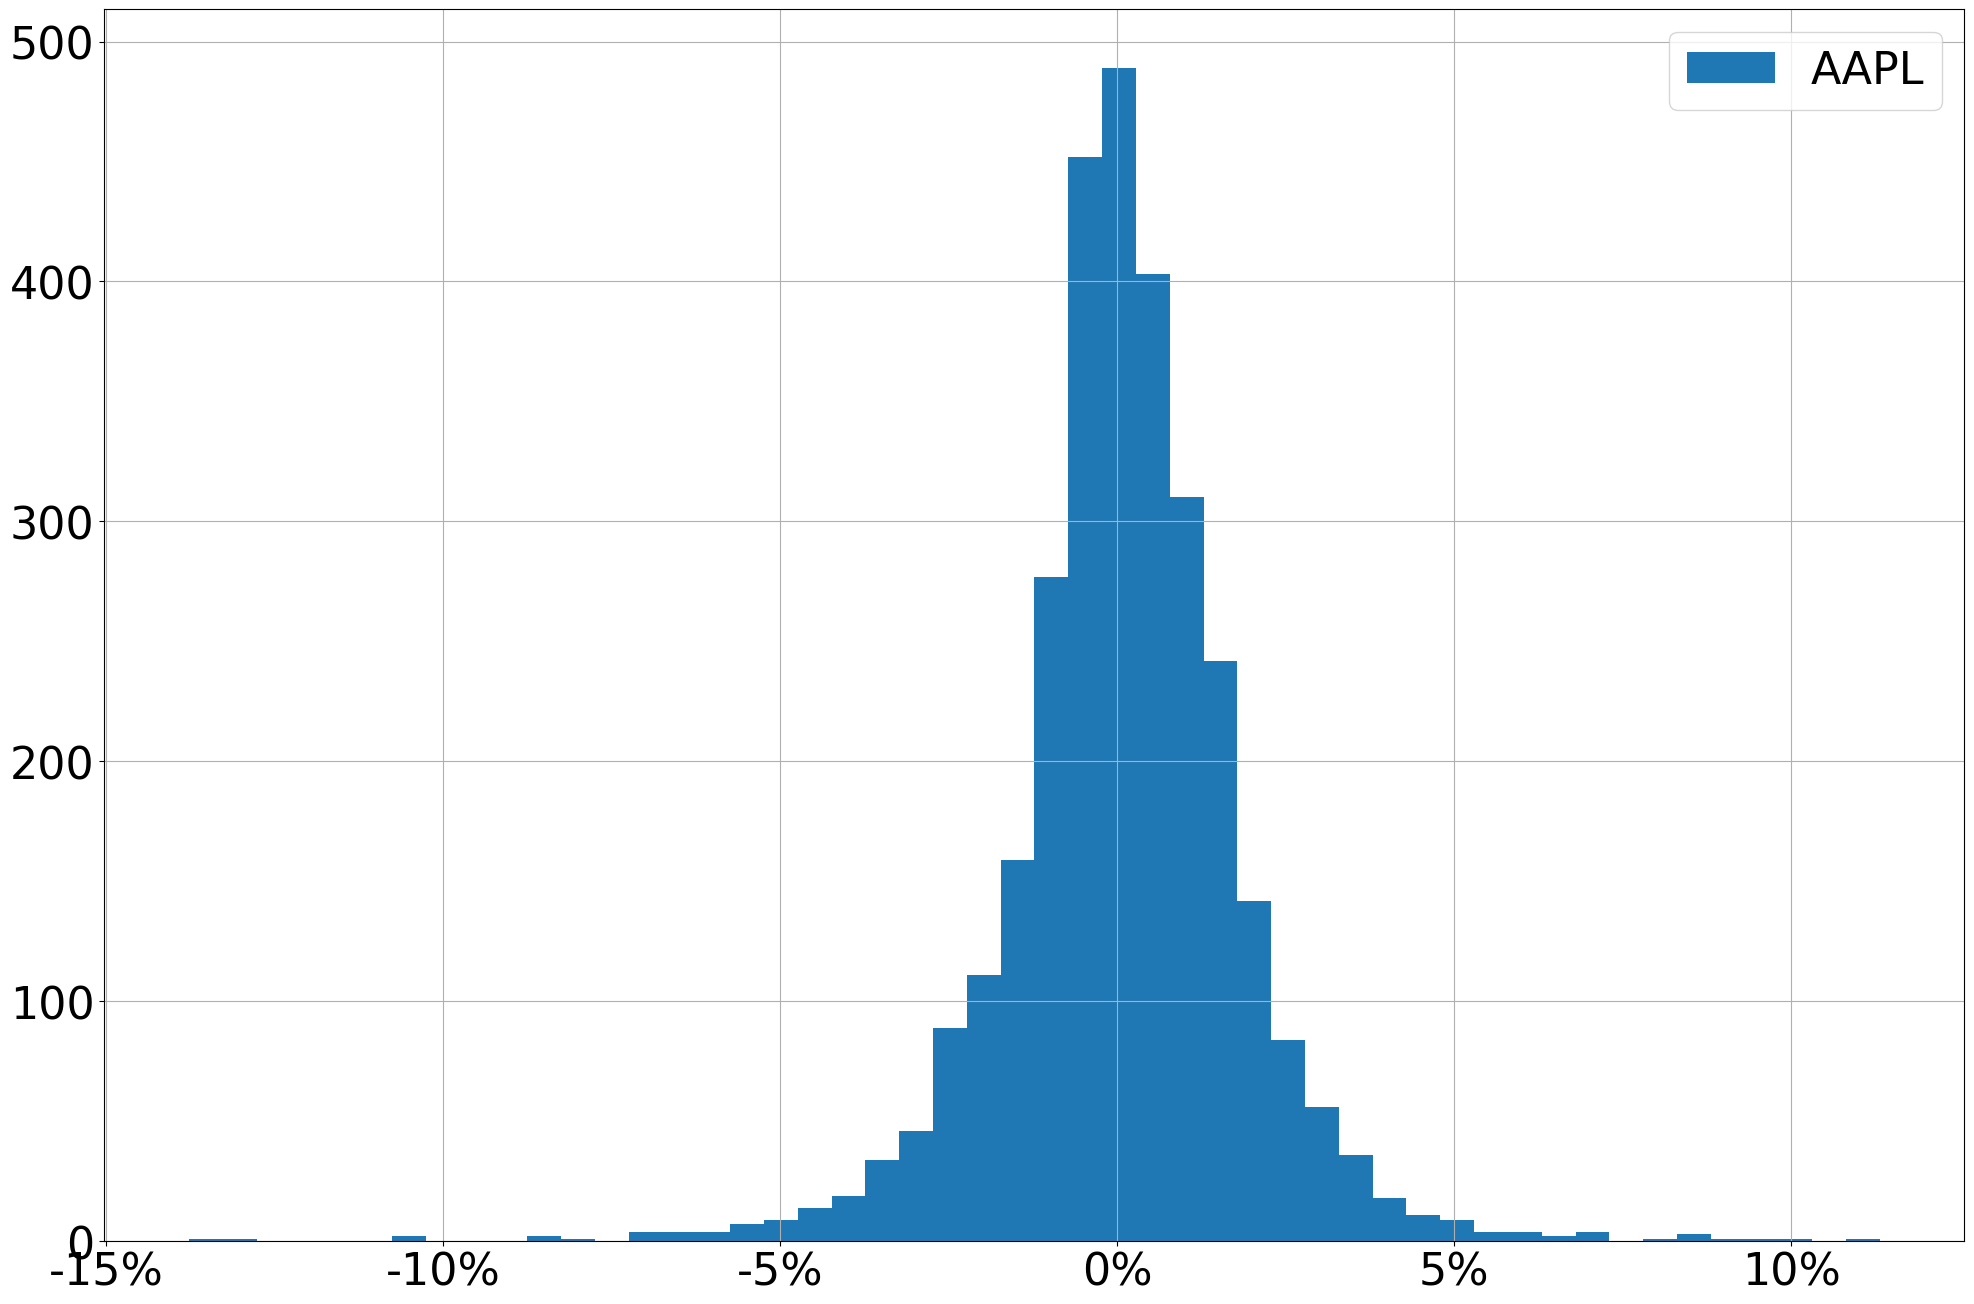

In [20]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.legend()

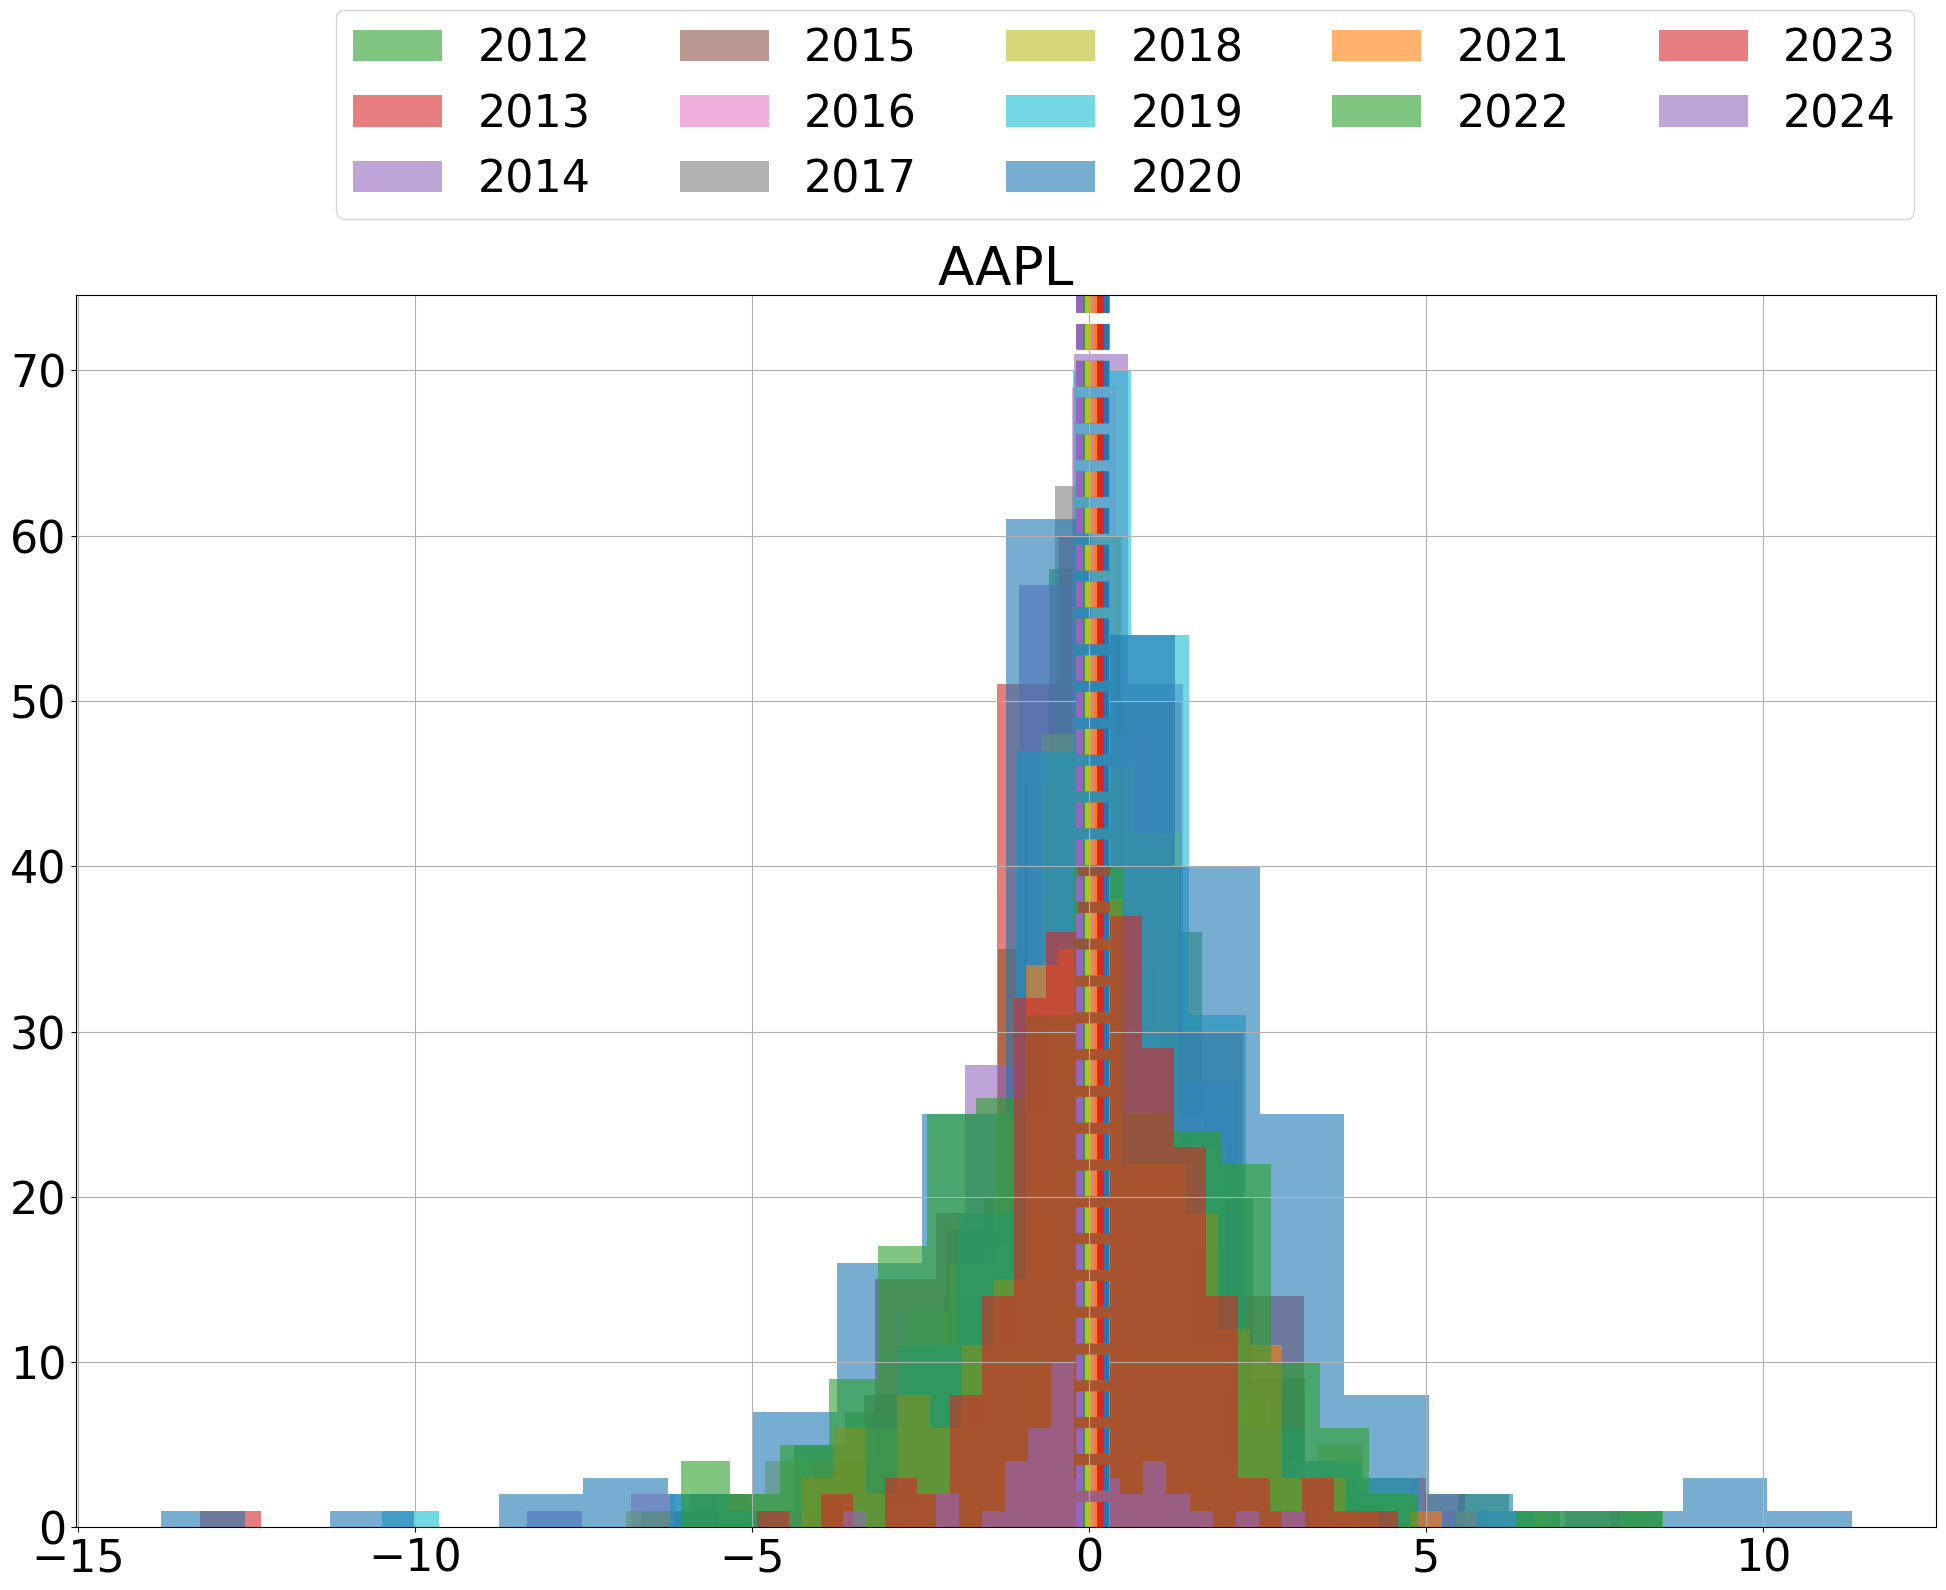

In [21]:
graph_yearly_distribution(price_change_data, "AAPL")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2058241939.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  price_change_data.hist(


array([[<Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'AAPL'}>],
       [<Axes: title={'center': 'PG'}>, <Axes: title={'center': 'TSLA'}>]],
      dtype=object)

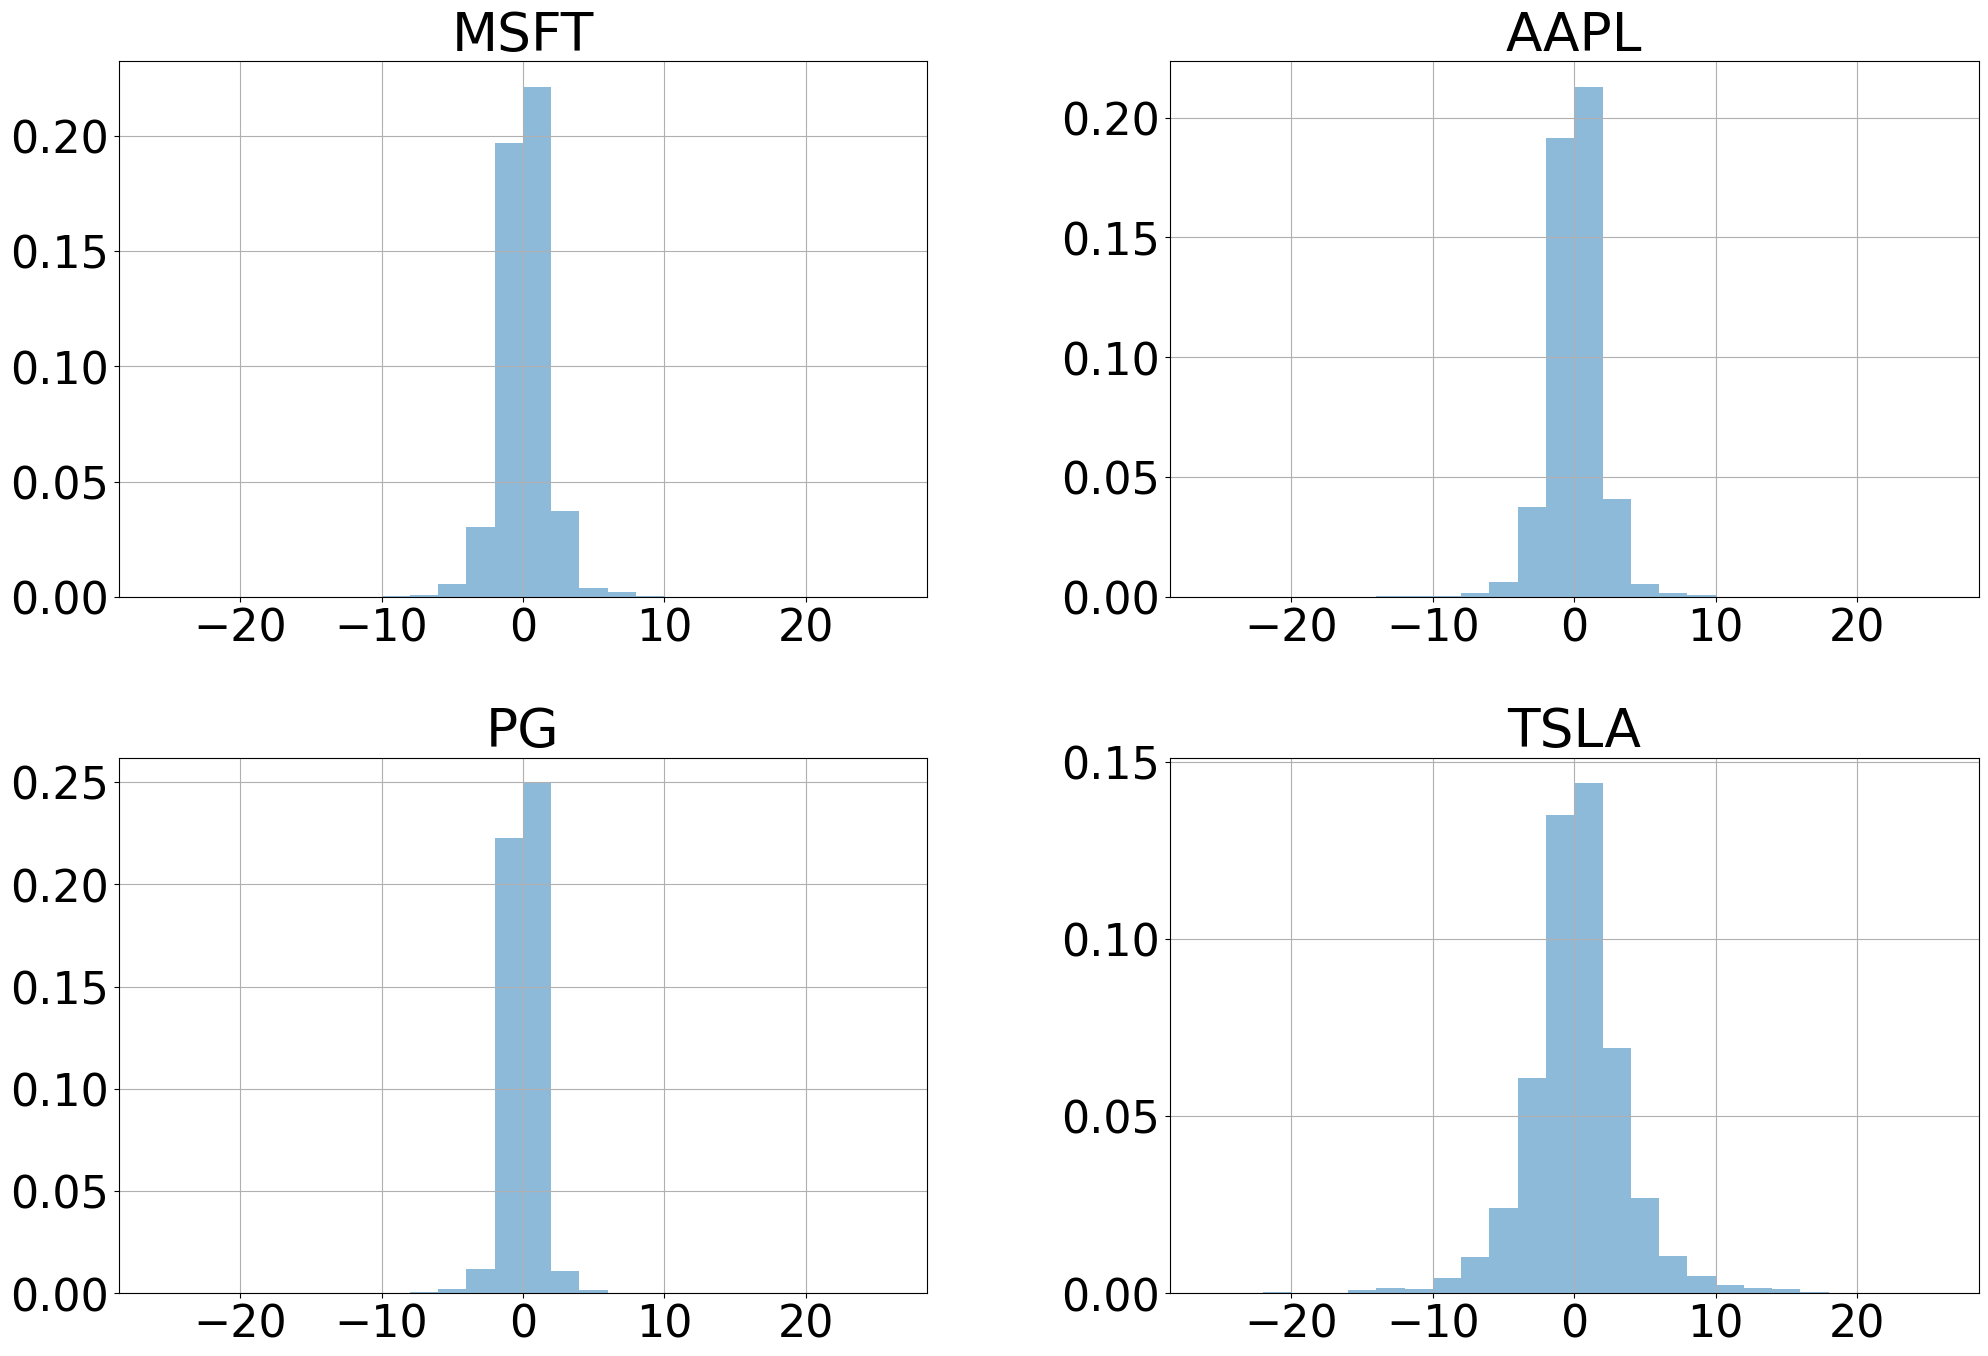

In [22]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data.hist(
                       alpha = .5,
                       ax = ax,
                      density = True,
                      bins = [i for i in range(-26, 27,2)])


[<Axes: title={'center': 'MSFT'}> <Axes: title={'center': 'AAPL'}>]
[<Axes: title={'center': 'PG'}> <Axes: title={'center': 'TSLA'}>]


C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2648322603.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2648322603.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


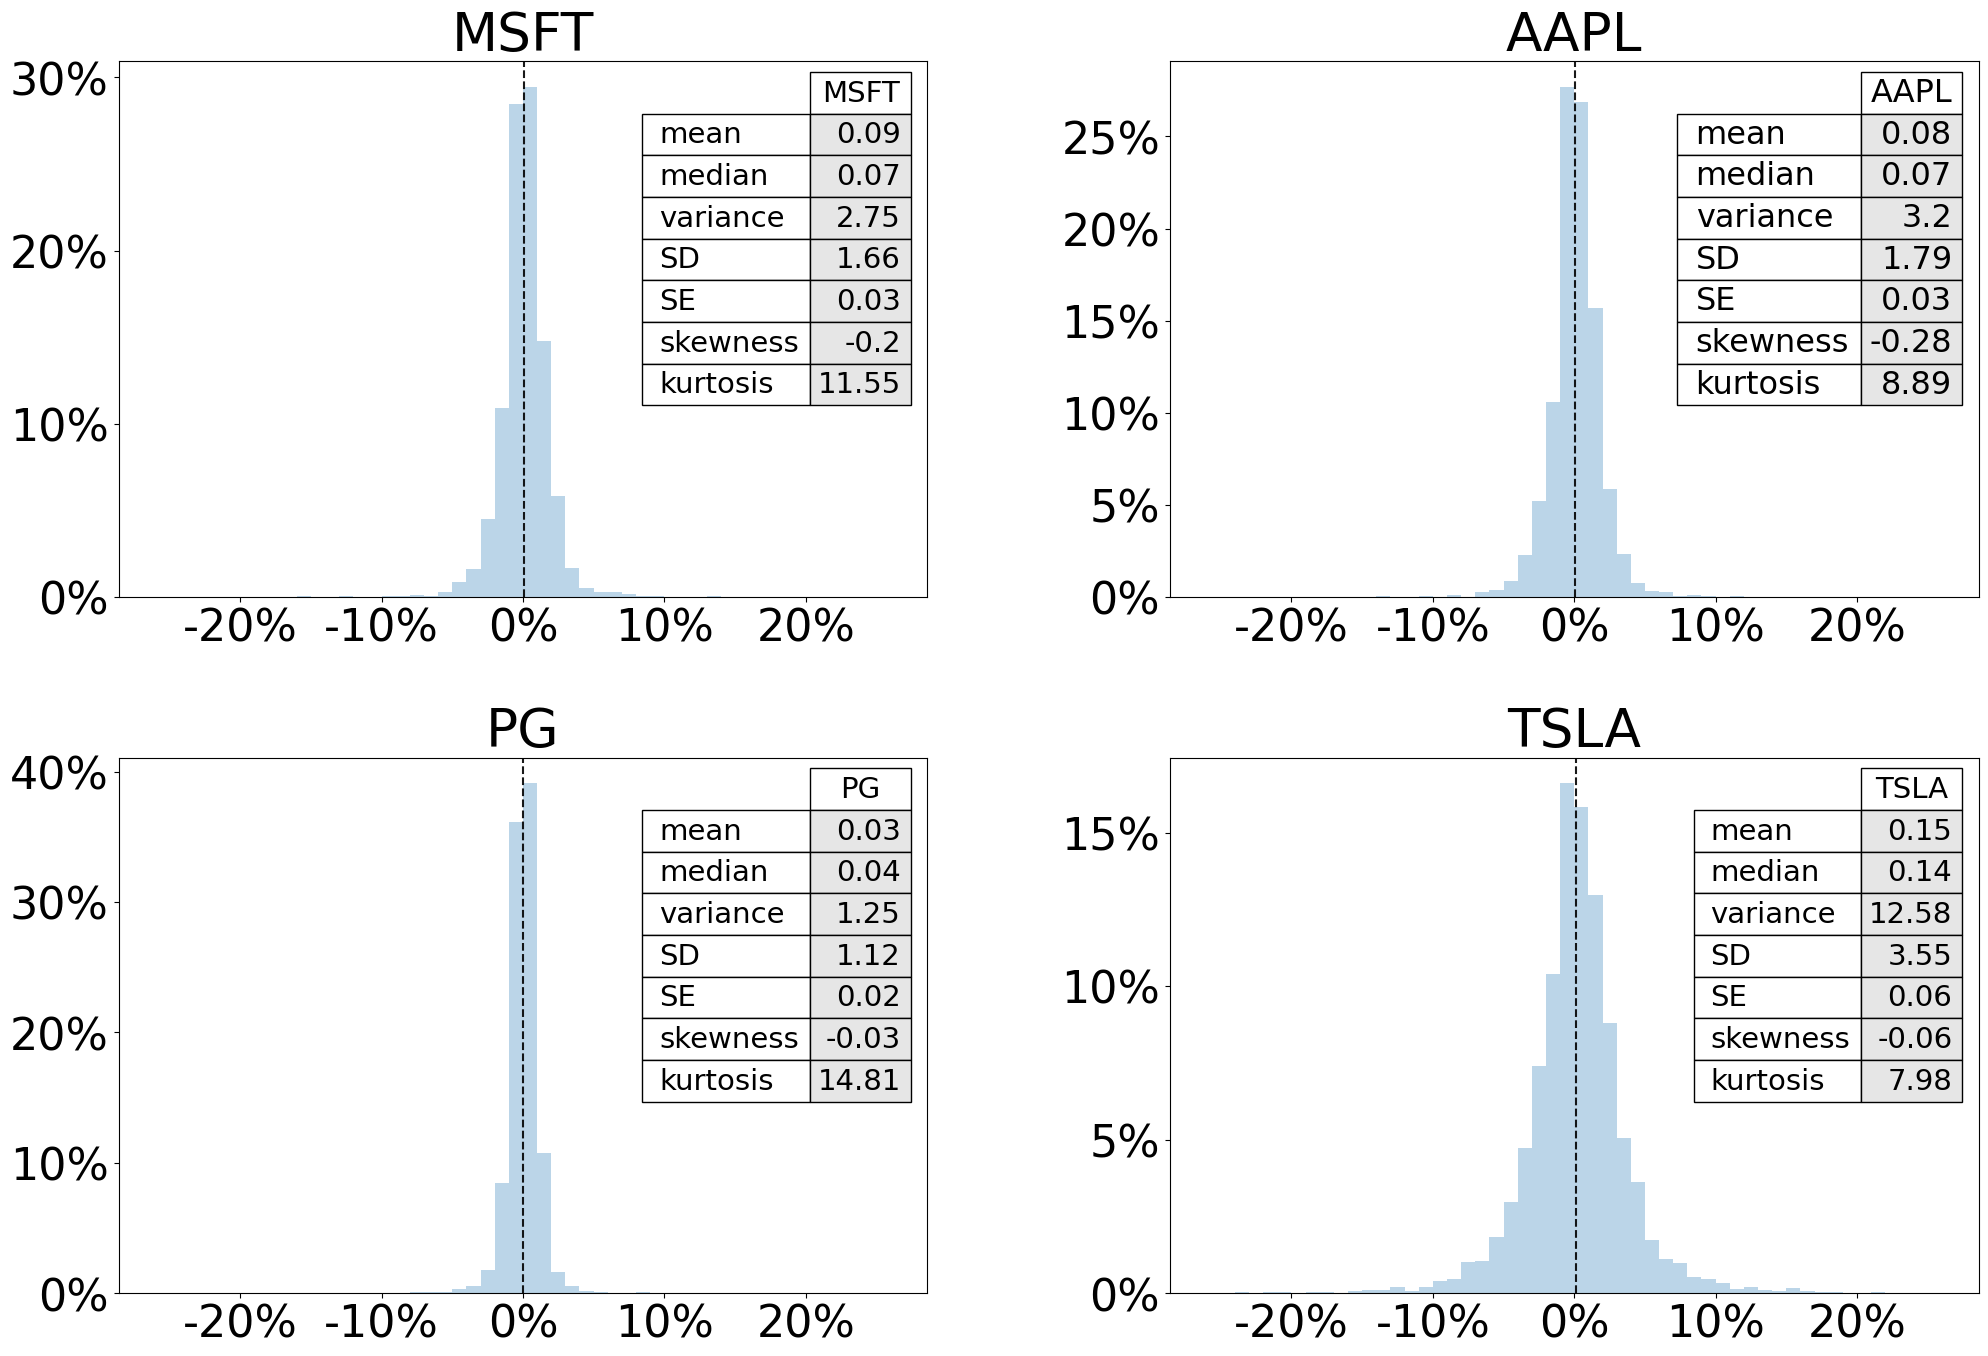

In [35]:
from pandas.plotting import table

# plot with 2 columns and 2 rows for subplots
fig, ax = plt.subplots(2, 2, figsize = (24,16))
price_change_data.hist(bins = [i for i in range(-26, 27,1)], 
#                        bins = 50,
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

# plot table with summary statistics
# cycle through each row in ax
for i in range(len(ax)):
    print(ax[i])
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock

        stock = a.title._text
        
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, 
                     colWidths=[.1], 
                     # make 7 grey cells where the values are output
                     cellColours=[[(.9,.9,.9)]]*7, 
                     loc = "upper right")
        stats.scale(1.25,2.5)
#         stats.auto_set_font_size(False)
#         stats.set_fontsize(20)
        # use the mean value of the log diff of stock prices for a 
        # vertical line
        a.axvline(x = hist_data.loc["mean"], ls = "--", color = "k", alpha= .9)
        # add % sign to values 
        x_vals = a.get_xticks()
        y_vals = a.get_yticks()
        
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals]) 
        a.grid(False)
        

C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2201464730.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2201464730.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


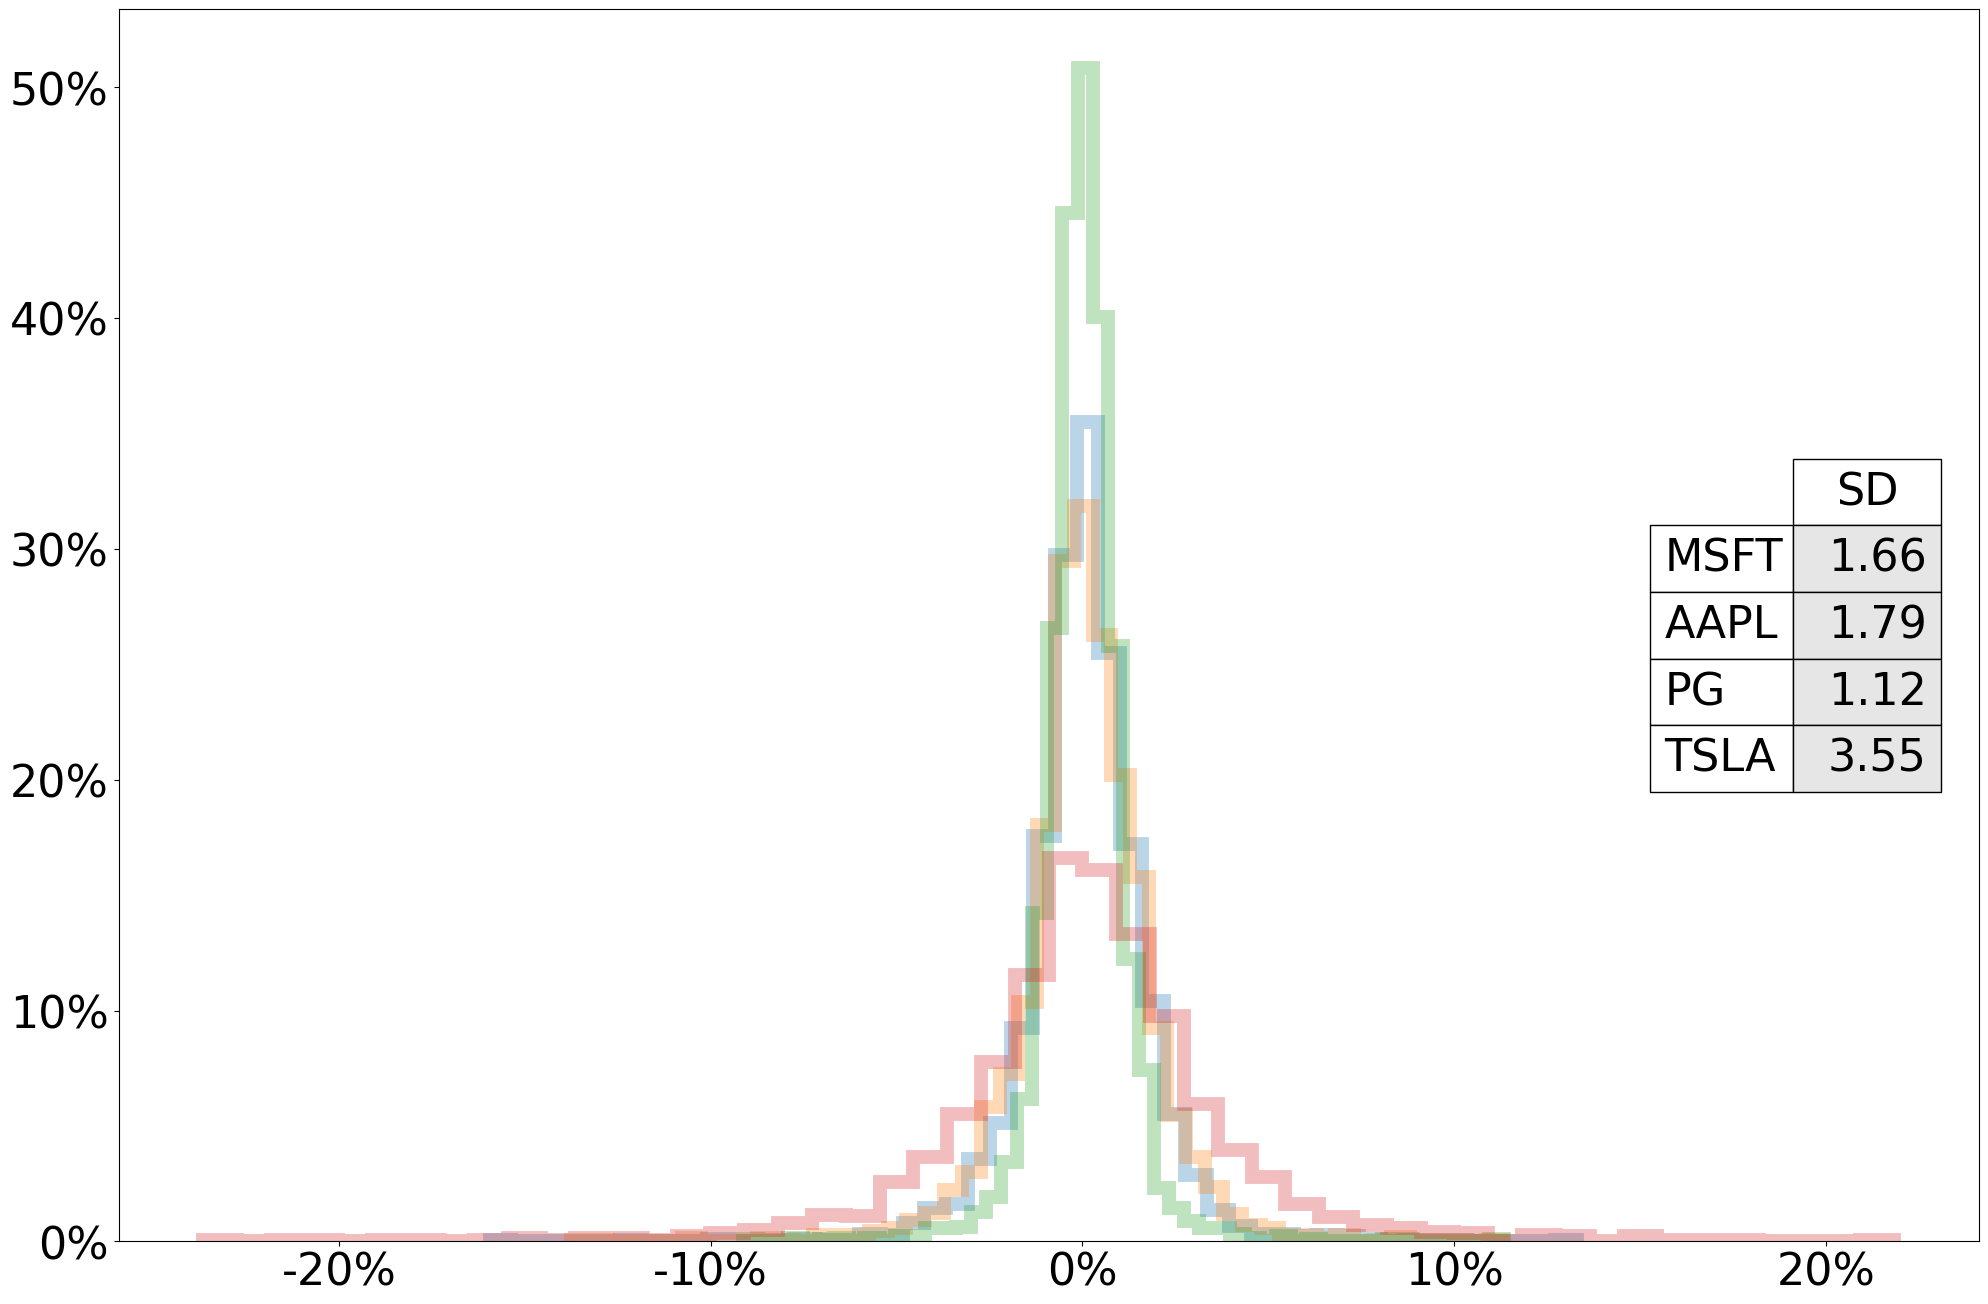

In [36]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50,
                               histtype = "step",
                               alpha = .3,
                               label = key,
                               linewidth = 10,
                               density = True)
# ax.axvline(x = hist_data.loc["mean"], ls = "--", color = "k", alpha= .9)
# add % sign to values 
x_vals = ax.get_xticks()
y_vals = ax.get_yticks()

ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals]) 
stats_table = table(ax, stats_df.loc["SD"], colWidths = [.1],
             cellColours = [[(.9, .9, .9)]]*4, loc = "center right")
stats_table.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2705400168.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_6720\2705400168.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


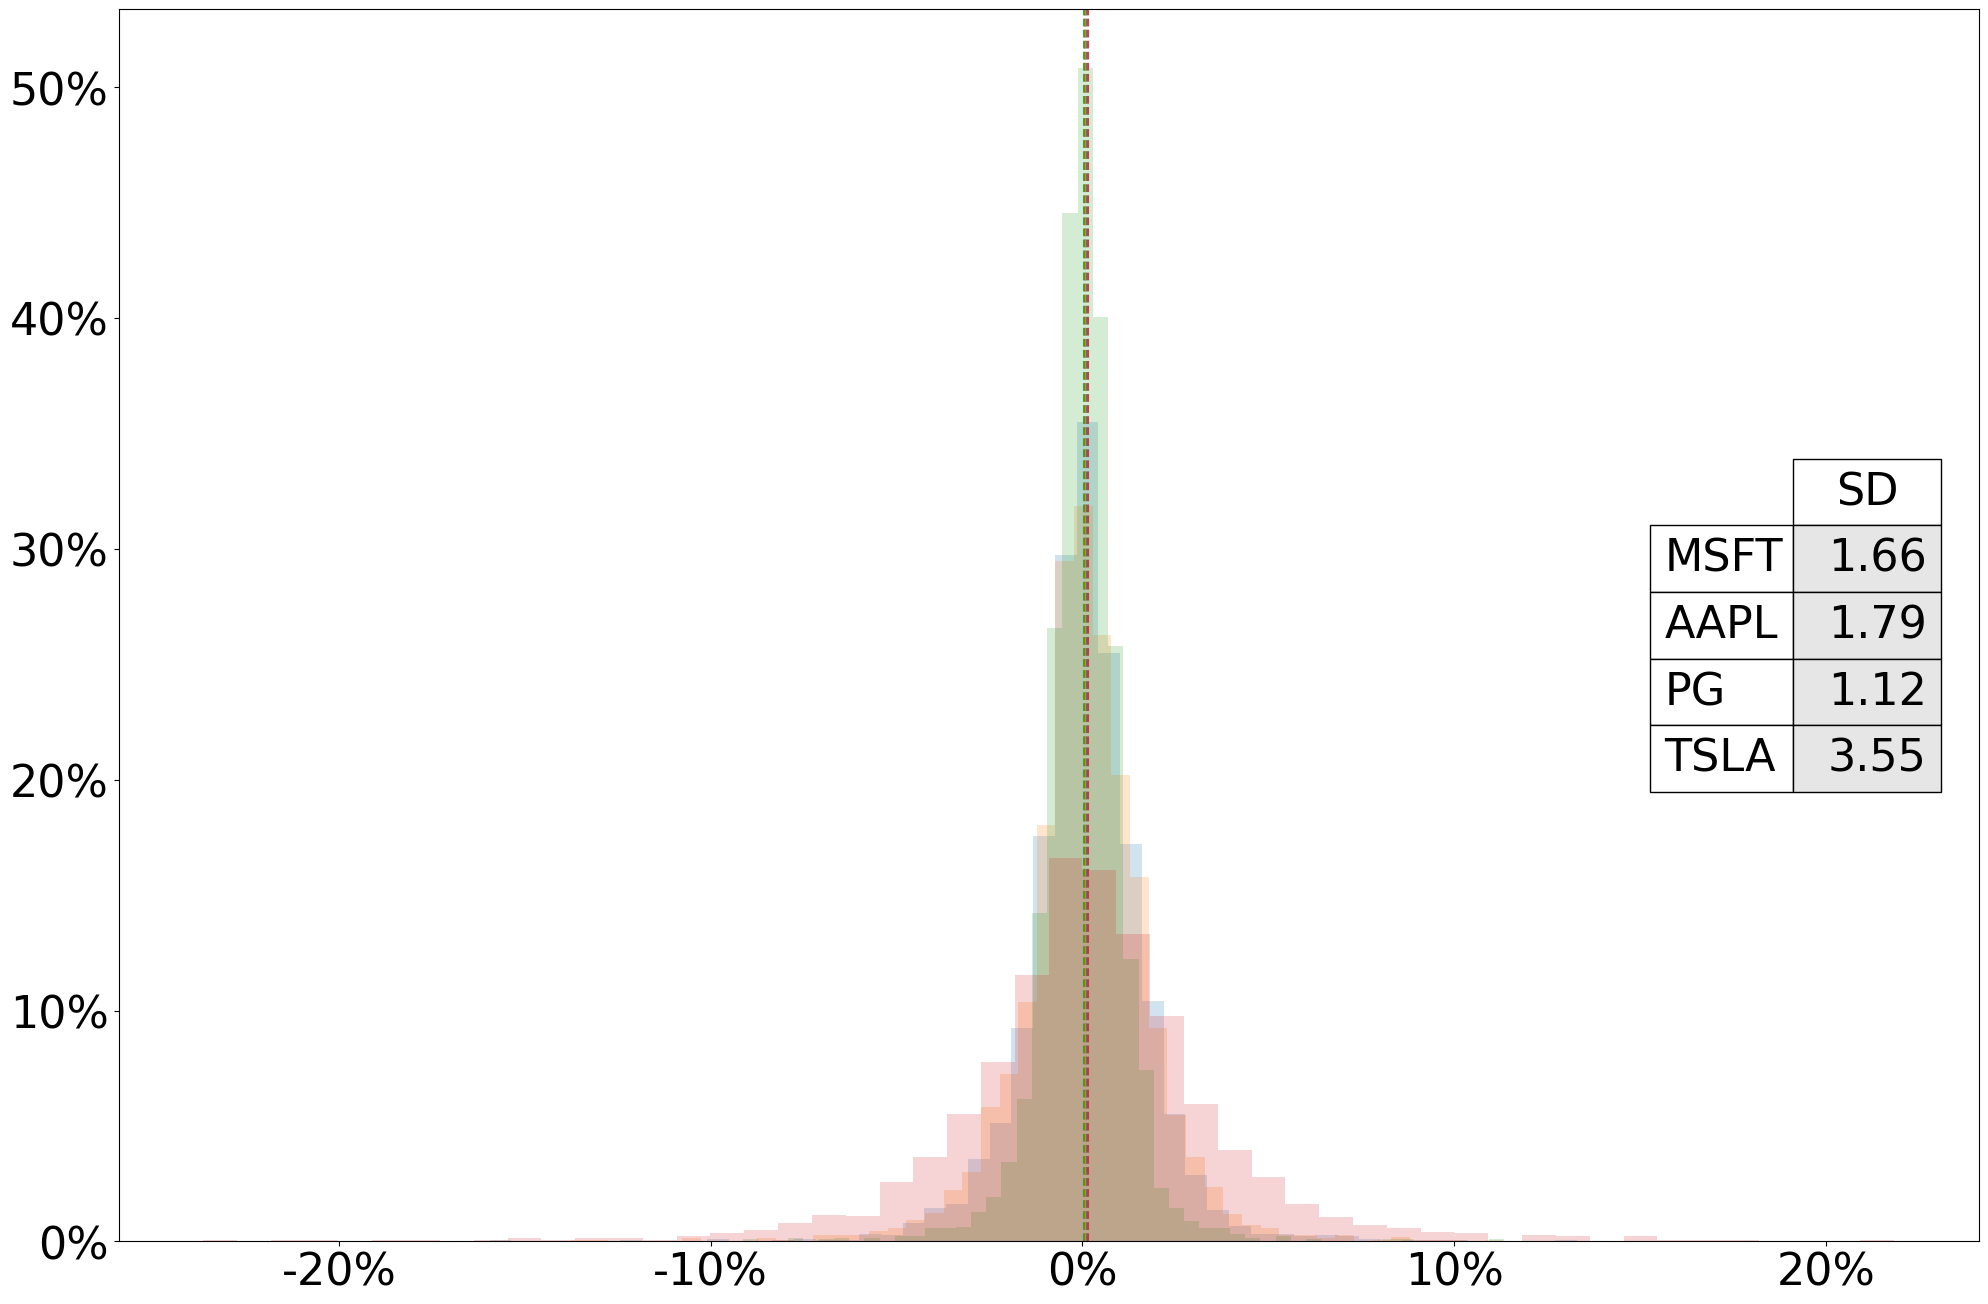

In [37]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50,
                               alpha = .2,
                               label = key,
                               linewidth = 10,
                               density = True)
# enumerate stocks to track and use index to create color (f"C{i}")
for i, stock in enumerate(stocks):
    ax.axvline(x = stats_df[stock]["mean"], 
               ls = "--", color = f"C{i}", alpha= .9)
# add % sign to values 
x_vals = ax.get_xticks()
y_vals = ax.get_yticks()

ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals]) 
stats_table = table(ax, stats_df.loc["SD"], colWidths = [.1],
             cellColours = [[(.9, .9, .9)]]*4, loc = "center right")
stats_table.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid()

<Axes: ylabel='Frequency'>

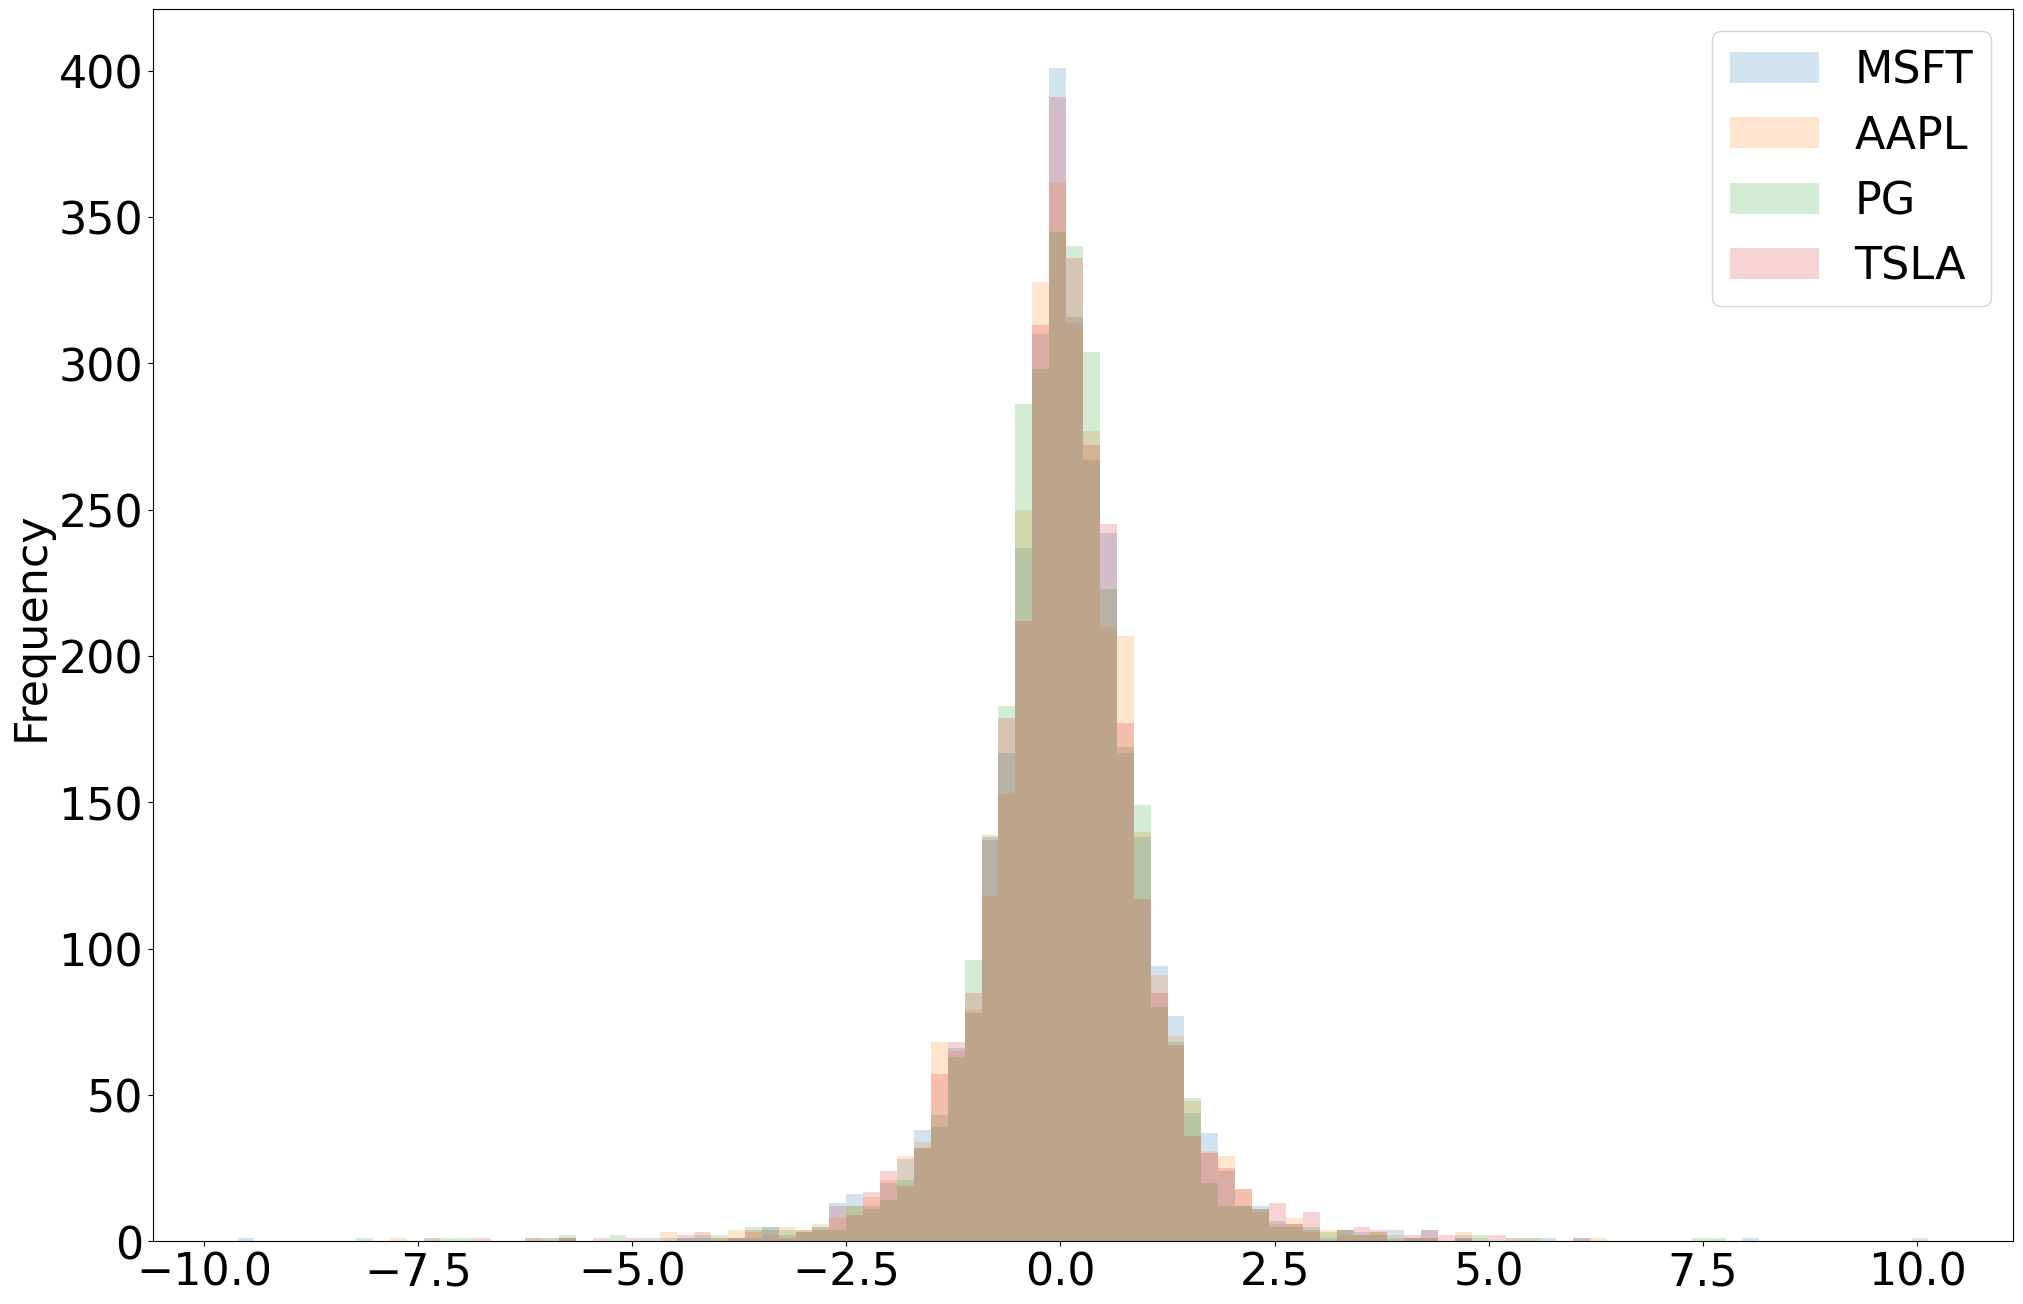

In [38]:
# Standardize Disributions

fig, ax = plt.subplots(figsize = (24, 16))
plot_data = price_change_data.div(
    price_change_data.std())[stocks]
plot_data.plot.hist(ax = ax,
                   bins = 100,
                   alpha = .2)

In [39]:
plot_data.describe()

,MSFT,AAPL,PG,TSLA
count,3058.000000,3058.000000,3058.000000,3058.000000
mean,0.053939,0.045856,0.025314,0.043149
std,1.000000,1.000000,1.000000,1.000000
min,-9.606890,-7.692977,-8.169160,-6.667580
25%,-0.414235,-0.422279,-0.439607,-0.434815
50%,0.040764,0.040488,0.033143,0.037935
75%,0.564456,0.570939,0.517111,0.530880
max,8.008823,6.321474,10.133159,6.153793


In [41]:
import numpy as np
import matplotlib.pyplot as plt
line = np.array([i + 3 for i in range(100)])
# fig, ax = plt.subplots(figsize = (12,6))
# ax.plot(line)

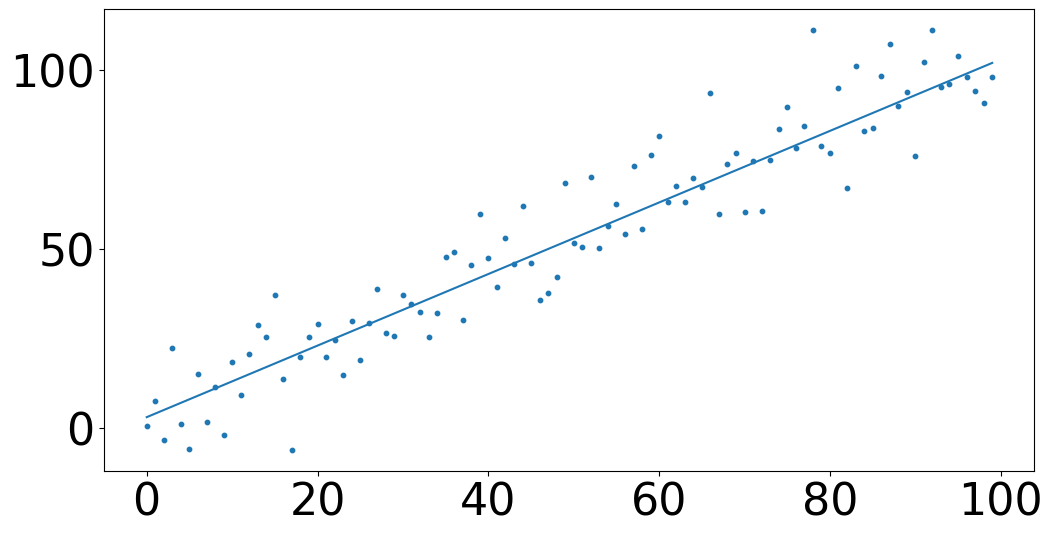

In [42]:
import random
points = []
for point in line:
    sigma = 10
    points.append(random.normalvariate(point, sigma))
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(line)
ax.scatter(np.arange(len(points)), points, s = 10)

In [43]:
# 1.

samples = [random.normalvariate(2,10) for j in range(1000)]
samples

[4.696340167703408,
 19.0598652131955,
 14.147908583392722,
 -1.170834998892004,
 3.5481307869787484,
 15.883144347413507,
 10.26149374428471,
 8.408824075979805,
 -3.2091778185416757,
 6.948991505205856,
 -2.605119775771315,
 10.459872832220062,
 15.386425062265426,
 5.0657523379899665,
 10.243648204408387,
 -4.239254195322131,
 7.660472878005529,
 -11.961666864946663,
 7.592639296125057,
 -7.44866201927622,
 13.44372875046976,
 15.125416323754997,
 -9.453091434602857,
 -2.6642727081696727,
 -2.238906563092815,
 -5.885761694890695,
 8.188123126563948,
 -0.8666070288315382,
 -10.946040963828608,
 15.621031400239003,
 -1.4063583440244982,
 5.90788297671387,
 -2.0291529095843064,
 -6.429006290389189,
 11.85053648053357,
 -3.7535511690380146,
 -7.978805514234741,
 3.429144477332228,
 -1.77037462285986,
 -2.7631333461804184,
 -14.134549354439624,
 9.637715542567523,
 5.157910961564546,
 10.991077592610466,
 10.52217013770384,
 -10.540558517390433,
 5.314709596712033,
 3.345366868680574,
 3

<Axes: ylabel='Frequency'>

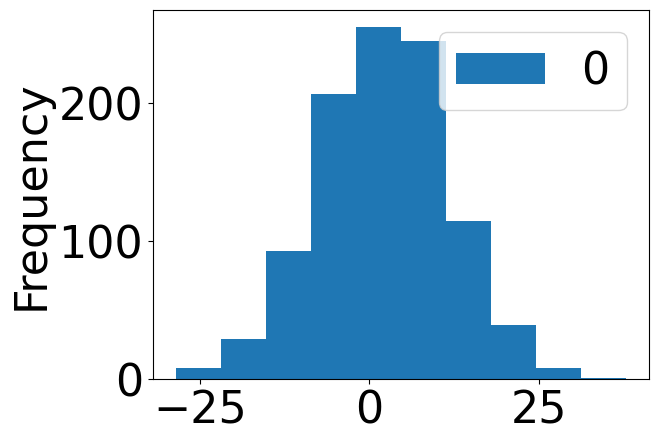

In [44]:
samples = pd.DataFrame(samples)
samples.plot.hist()

<Axes: >

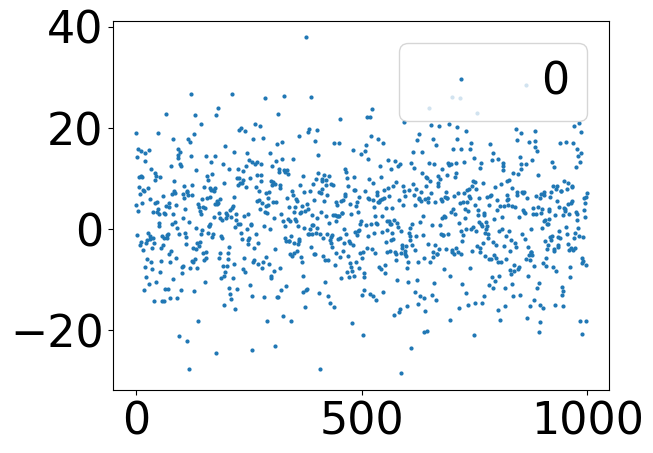

In [45]:
samples.plot(ls = "", marker = ".", markersize = 4)

<Axes: >

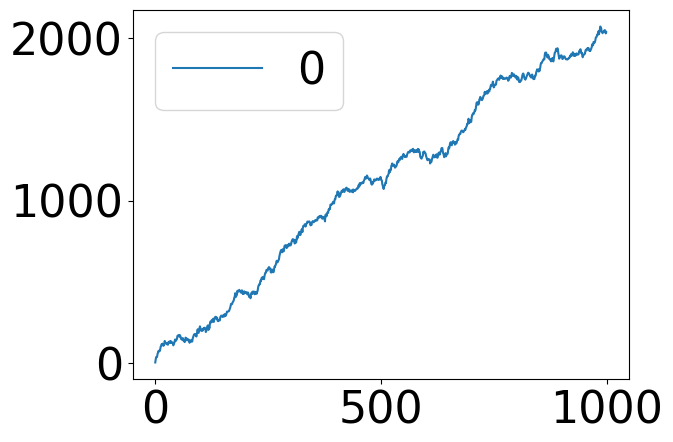

In [46]:
samples.cumsum().plot()